# 기본세팅

In [ ]:
!pip install pycaret

In [ ]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
 매수종목1.txt
 매수종목2.txt
 aclImdb.zip
 adult.data
 app_clf
 auto-mpg.csv
 bmi_500.csv
 citibike.csv
 CNN_routers_model.h5
 Covid19GenAgeCaseInf.csv
 Covid19InfState.csv
 Covid19NatInfState.csv
 Covid19SidoInfState.csv
 매수종목.csv
 database
 data_mine.csv
 DataNetflixRevenue2020_V2.csv
 DataNetflixSubscriber2020_V2.csv
 data_population.csv
 data_studentlist_en.csv
 diabetes.csv
 example.docx
 glove.6B.zip
 height_weight.txt
 Helloword.xlsx
 HelloWorld.xlsx
 KOBIS__.xlsx
 lenna.png
 little-char.png
 LSTM_CNN_model.h5
 LSTM_model.h5
 LSTM_routers_model.h5
 ml-latest-small
 movieclassifier
 NetflixsRevenue2018toQ2_2020.csv
 NetflixSubscribersbyCountryfrom2018toQ2_2020.csv
 netflix_titles.csv
 open
 open.zip
 population_number.csv
 ram_price.csv
 ratings_small.txt
 ratings_test.txt
 ratings_train.txt
 sample1.pdf
 sample2.pdf
 sample_merge.pdf
 sample.xlsx
 santander-customer-satisfaction
 score.csv
 simpleRNN_model.h5
 sonar.csv
 stock-data.csv
'stock price.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import log_loss, make_scorer

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from lightgbm import LGBMClassifier

In [ ]:
from pycaret.classification import *

## 설명
gender: 성별

car: 차량 소유 여부

reality: 부동산 소유 여부

child_num: 자녀 수


income_total: 연간 소득


income_type: 소득 분류
   - 'Commercial associate', 'Working', 'State servant', 'Pensioner'=연금, 'Student'


edu_type: 교육 수준
  - 'Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree'


family_type: 결혼 여부
  - 'Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow'


house_type: 생활 방식
  - 'Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment'
  - 시립 아파트?, 집, 부모, 협동조합 아파트?, 전월세, 오피스텔?

DAYS_BIRTH: 출생일 
  - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미



DAYS_EMPLOYED: 업무 시작일
  - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
  - 양수 값은 고용되지 않은 상태를 의미함



FLAG_MOBIL: 핸드폰 소유 여부


work_phone: 업무용 전화 소유 여부


phone: 전화 소유 여부


email: 이메일 소유 여부


occyp_type: 직업 유형													


family_size: 가족 규모


begin_month: 신용카드 발급 월
  - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미


 ** credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함 **
## 가설

### 약한 관련
- gender, FLAG_MOBIL,phone, email  

### 애매한 관련
- DAYS_EMPLOYED
- work_phone
- begin_month  

### 강한 관련
- car,
- reality 
- child_num
- come_total
- come_type(상업종사자), occyp_type: 직업 유형 연관 
- family_type(결혼 한 경우)
- edu_type(교육수준이 높을수록 더 많은 신용대출이 가능), 
- DAYS_BIRTH: 출생일을 통해서 나이를 구하고 청년 나이대에 신용도가 다를 수 있음을 예측할 수 있음
- family_size


# Check Dataset

In [ ]:
submit = pd.read_csv(drive_path + 'open/sample_submission.csv')

In [ ]:
train = pd.read_csv(drive_path + 'open/train.csv')
test = pd.read_csv(drive_path + 'open/test.csv')
train.shape

(26457, 20)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


직업유형이 결측값이 많은 것으로 발견됨

In [ ]:
for col in train.columns:
    msg = 'column:{:>10} \t Percent of NaN value {:.2f}%'.format(col,100*(train[col].isnull().sum()/train[col].shape[0]))
    print(msg)

column:     index 	 Percent of NaN value 0.00%
column:    gender 	 Percent of NaN value 0.00%
column:       car 	 Percent of NaN value 0.00%
column:   reality 	 Percent of NaN value 0.00%
column: child_num 	 Percent of NaN value 0.00%
column:income_total 	 Percent of NaN value 0.00%
column:income_type 	 Percent of NaN value 0.00%
column:  edu_type 	 Percent of NaN value 0.00%
column:family_type 	 Percent of NaN value 0.00%
column:house_type 	 Percent of NaN value 0.00%
column:DAYS_BIRTH 	 Percent of NaN value 0.00%
column:DAYS_EMPLOYED 	 Percent of NaN value 0.00%
column:FLAG_MOBIL 	 Percent of NaN value 0.00%
column:work_phone 	 Percent of NaN value 0.00%
column:     phone 	 Percent of NaN value 0.00%
column:     email 	 Percent of NaN value 0.00%
column:occyp_type 	 Percent of NaN value 30.88%
column:family_size 	 Percent of NaN value 0.00%
column:begin_month 	 Percent of NaN value 0.00%
column:    credit 	 Percent of NaN value 0.00%


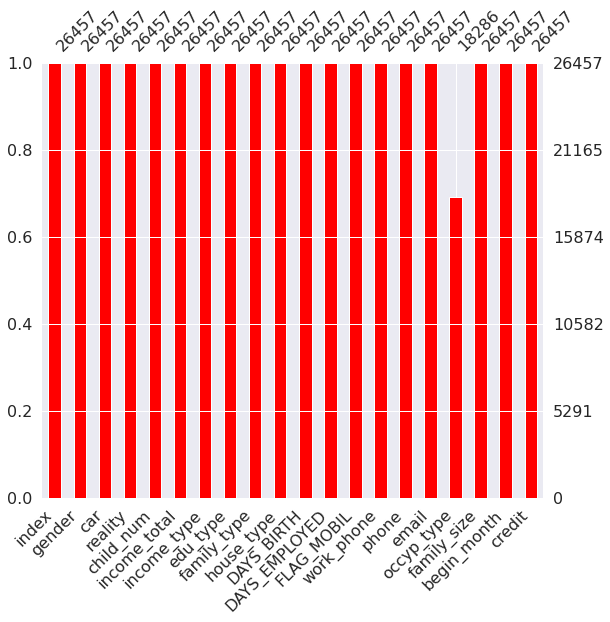

In [ ]:
msno.bar(df=train.iloc[:,:],figsize=(8,8),color='red')

1. child_num: 19 인것은 오류일 가능성이 있음
2. DAYS_EMPLOYED: 양수는 실업자 0으로 치환하기
3. FLAG_MOBIL: 제거 모두 1임
4. email: 없는 사람이 1퍼센트도 안됨
5. family_size: 20인 것은 이상치임 자녀수와 마찬가지로 조치필요

In [ ]:
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
test.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,31456.50000,0.434700,1.850433e+05,-16020.466400,59776.690400,1.0,0.227600,0.296300,0.085600,2.202700,-26.272400
std,2886.89568,0.729102,1.015398e+05,4197.672887,138121.224504,0.0,0.419304,0.456648,0.279786,0.898272,16.348557
min,26457.00000,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,28956.75000,0.000000,1.215000e+05,-19483.250000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,31456.50000,0.000000,1.575000e+05,-15606.000000,-1577.000000,1.0,0.000000,0.000000,0.000000,2.000000,-25.000000
75%,33956.25000,1.000000,2.250000e+05,-12539.000000,-410.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,36456.00000,5.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,7.000000,0.000000


Text(0.5, 1.0, 'Piechart')

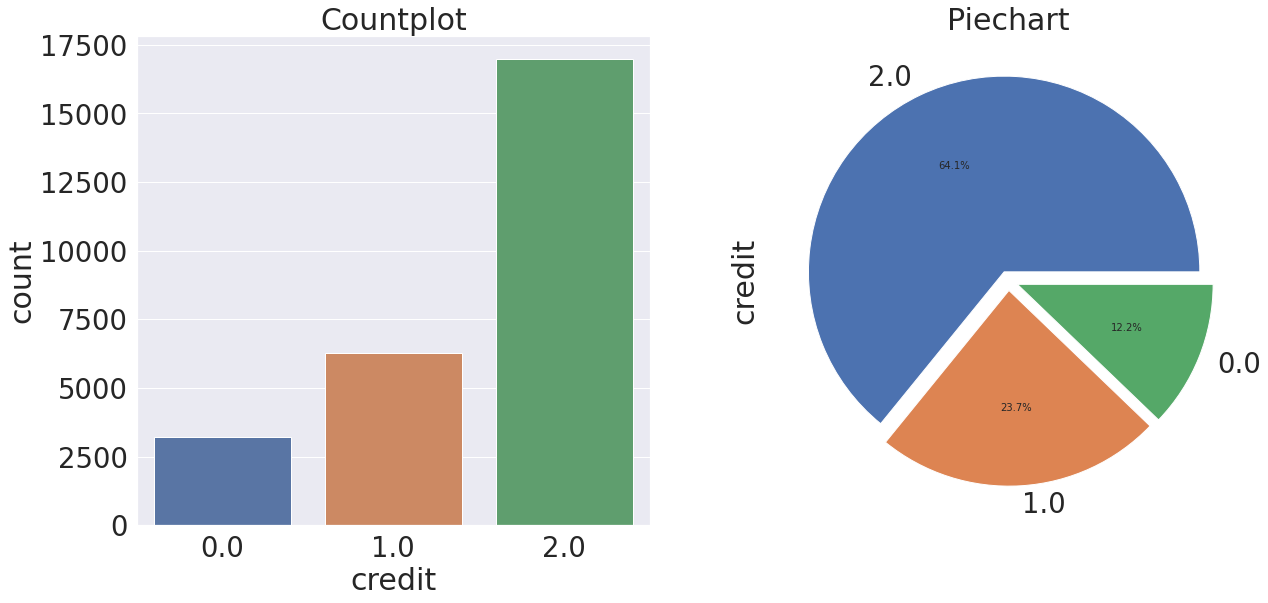

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,9))
sns.countplot(train.credit,ax=ax[0])
ax[0].set_title('Countplot')
train['credit'].value_counts().plot.pie(explode = [0.05,0.05,0.05],autopct = '%1.1f%%',ax=ax[1])
ax[1].set_title('Piechart')


## Gender VS Credit
- 애초에 수집된 데이터 자체가 남 녀 성비가 1:2에 가까움
- 성별에 따른 신용도 분포에서 그 성비가 거의 동일하게 유지되는 것을 볼 수 있음
- **따라서 성별에 따른 신용도의 차이는 크지 않은 것을 보임. Feature로는 사용하지 않는 것이 좋아 보임**

In [ ]:
pd.crosstab(train['credit'], train['gender'], margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(train['gender'],ax=ax[0])
ax[0].set_title('Gender')
sns.countplot(train['credit'],hue=train['gender'],ax=ax[1])
ax[1].set_title('Gender vs Credit')

##  FLAG_MOBIL, phone, work_phone, email VS Credit
1. FLAG_MOBIL 은 애초에 별 의미가 없는 변수인것을 알 수 있으며
2. phone, work_phone, email 모두 그 비율이 신용도에 따라서 크게 달라지는 것을 볼 수 없기 때문에 그렇게 유의미한 변수로 보이진 않는다

In [ ]:
sns.countplot(train['FLAG_MOBIL'])

In [ ]:
f, ax = plt.subplots(3,2,figsize=(18,29))
ax= ax.ravel()
ax[0].set_title('phone')
sns.countplot(train.phone,ax = ax[0])
ax[1].set_title('phone vs credit')
sns.countplot(train.credit,hue = train.phone,ax = ax[1])
ax[2].set_title('work_phone')
sns.countplot(train.work_phone,ax = ax[2])
ax[3].set_title('work_phone vs credit')
sns.countplot(train.credit,hue = train.work_phone,ax = ax[3])
ax[4].set_title('email')
sns.countplot(train.email,ax = ax[4])
ax[5].set_title('email vs credit')
sns.countplot(train.credit,hue = train.email,ax = ax[5])

## Car, Reality  VS Credit

생각보다 신용도에 따른 비율차이가 크진 않았음  feature로써 영향력이 그렇게 클 것 같지 않았음 

- 차량 구매 때문에 신용대출을 받아 신용도가 낮을거라고 생각했지만 그렇지 않았음. 전체적으로 차가 많이 없었음

- 대신 부동산을 가진 사람들이 많았는데 부동산이 있을 수록 아주 조금 신용도가 낮아진다고 볼 수 있음 아주 조금 

- 따라서 car, reality는 교호작용항으로라도 사용해불 수 있을 거라고 생각됨

- 차가 있는 사람들이 수익이 더 높은 경향이 있음 car*income_total 사용

Text(0.5, 1.0, 'Reality')

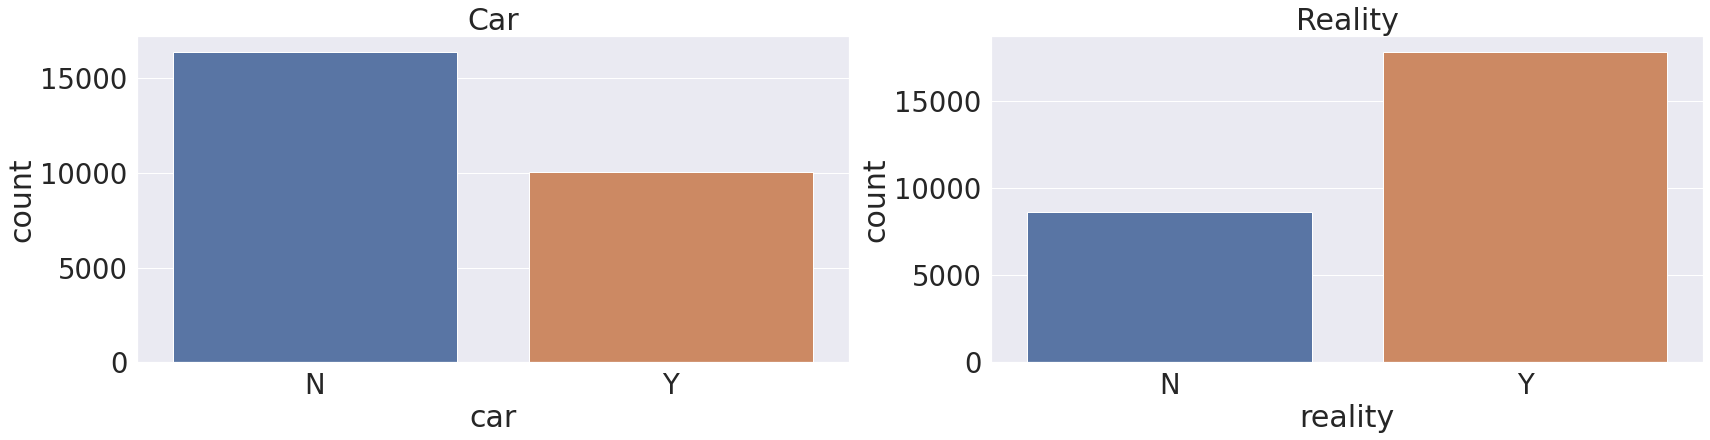

In [ ]:
f, ax = plt.subplots(1,2,figsize=(25,6))
sns.countplot(train.car,ax=ax[0])
ax[0].set_title('Car')
sns.countplot(train.reality,ax=ax[1]) 
ax[1].set_title('Reality')

Text(0.5, 1.0, 'Reality VS Credit')

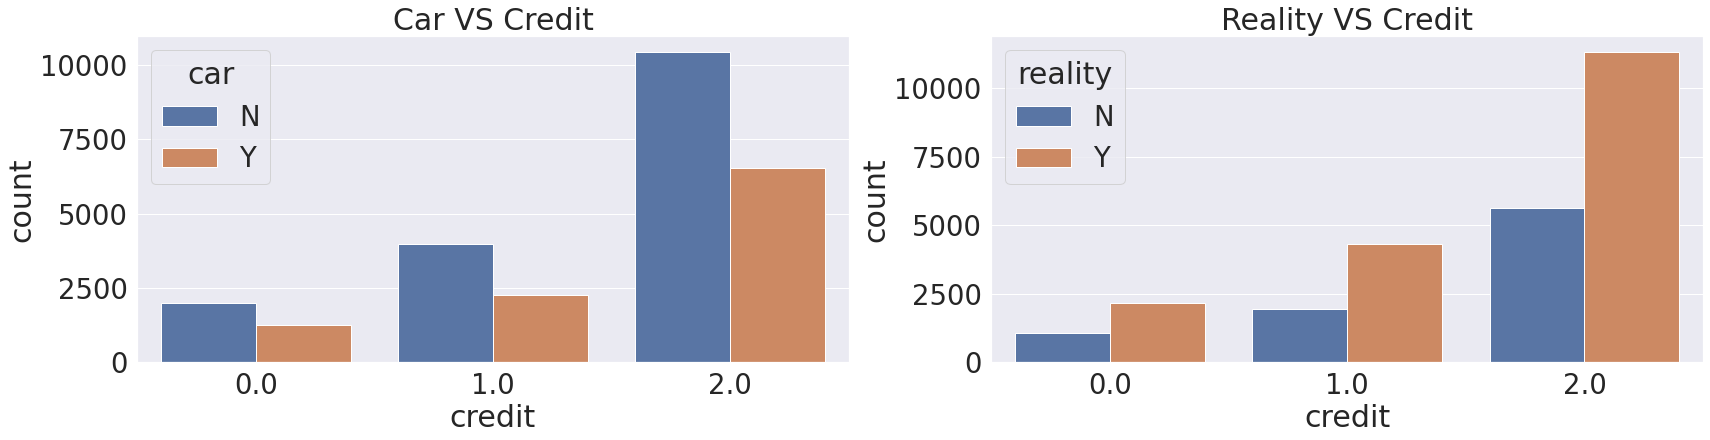

In [ ]:
f, ax = plt.subplots(1,2,figsize=(25,6))
sns.countplot(train.credit,hue=train.car,ax=ax[0])
ax[0].set_title('Car VS Credit')

sns.countplot(train.credit, hue = train.reality,ax=ax[1]) 
ax[1].set_title('Reality VS Credit')

In [ ]:
pd.crosstab(train['credit'], train['car'], margins=True).style.background_gradient(cmap='summer_r')

car,N,Y,All
credit,,,
0.0,1982,1240,3222
1.0,3990,2277,6267
2.0,10438,6530,16968
All,16410,10047,26457


In [ ]:
pd.crosstab(train['credit'], train['reality'], margins=True).style.background_gradient(cmap='summer_r')

reality,N,Y,All
credit,,,
0.0,1064,2158,3222
1.0,1935,4332,6267
2.0,5628,11340,16968
All,8627,17830,26457


In [ ]:
f, ax = plt.subplots(1,2,figsize=(16,8))
sns.violinplot(x = 'car', y='income_total',hue='credit',data=train,ax=ax[0])
sns.violinplot(x = 'reality', y='income_total',hue='credit',data=train,ax=ax[1])

In [ ]:
f, ax = plt.subplots(1,2,figsize=(16,8))
sns.violinplot(x = 'credit', y='income_total',hue='car',data=train,ax=ax[0])
sns.violinplot(x = 'credit', y='income_total',hue='reality',data=train,ax=ax[1])

## child_num, family_size, family_type VS Credit

- 이상한 부분들이 있었음, 독신인데 자녀의 수가 19명인 경우(입양?), 이혼했는데 자녀가 14명인 경우(3케이스 정도) 이 부분들은 해석 여부에 따라서 아예 삭제를 해도 좋을 것 같음
- 자녀 수는 3 이상 가족수는 5이상으로 묶어주는 것이 좋을 것 같음
- 결론적으로 세가지 변수 모두 딱히 의미있는 feature로 보이지 않음
- 가족 타입은 교호작용항으로 쓸 수 있지 않을까 싶었음

Text(0.5, 1.0, 'Child_num VS Credut')

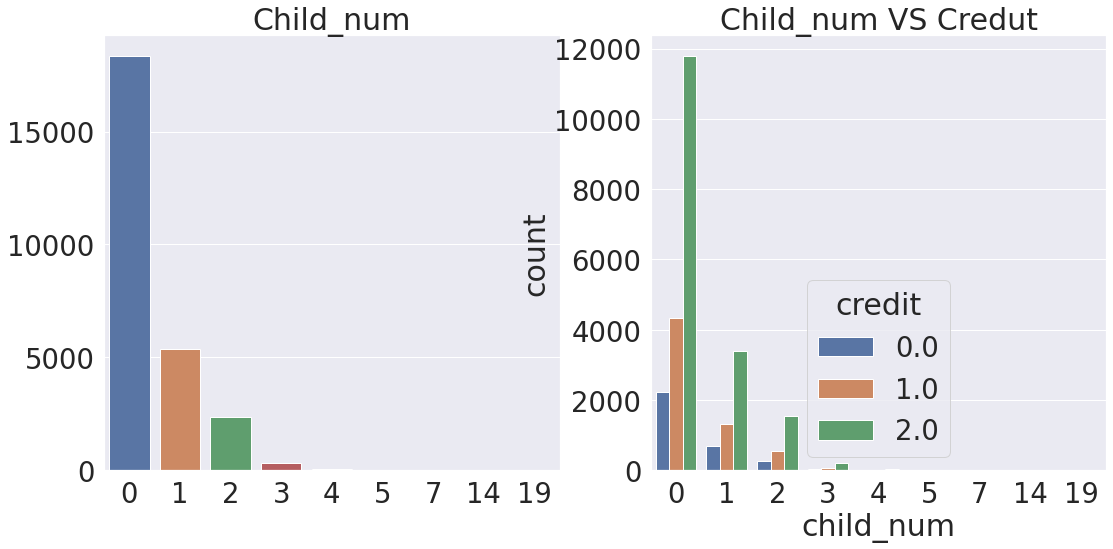

In [ ]:
f, ax= plt.subplots(1,2,figsize=(16,8))
data = train.child_num.value_counts().sort_index()
sns.barplot( x=data.index , y = data.values,ax=ax[0])
ax[0].set_title('Child_num')
sns.countplot('child_num',hue='credit',data=train, ax=ax[1])
ax[1].set_title('Child_num VS Credut')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

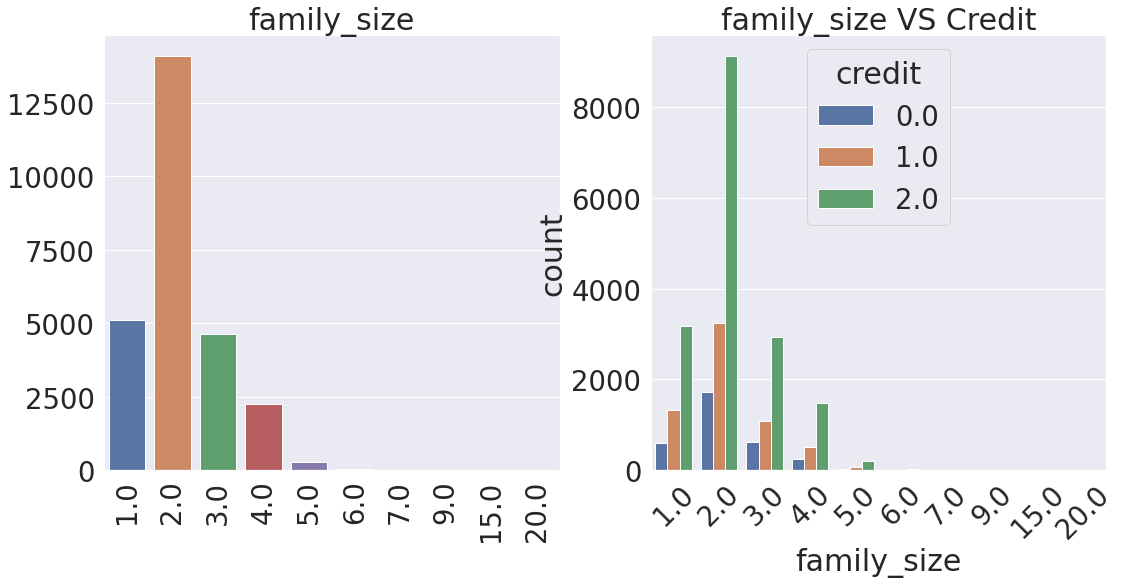

In [ ]:
f, ax= plt.subplots(1,2,figsize=(16,8))
data = train.family_size.value_counts().sort_index()
sns.barplot( x=data.index , y = data.values,ax=ax[0])
plt.xticks(rotation=45)
ax[0].tick_params(labelrotation=90,axis='x')
ax[0].set_title('family_size')

sns.countplot('family_size',hue='credit',data=train, ax=ax[1])
ax[1].set_title('family_size VS Credit')
plt.xticks(rotation=45)


In [ ]:
train[train['child_num']>3].index

Int64Index([  321,   342,   875,   998,  1061,  1417,  2671,  2821,  3116,
             3134,  3973,  3988,  4094,  4118,  4355,  5681,  7195,  7671,
             8431,  8462,  8581,  8957,  9021,  9337,  9615,  9683,  9895,
            10162, 10321, 10359, 10731, 11259, 12187, 12876, 12953, 13286,
            13449, 13483, 13677, 14599, 14733, 14812, 14829, 15720, 17560,
            17978, 18293, 18363, 19792, 20117, 20329, 20557, 21639, 22024,
            22155, 22592, 23782, 24077, 25313, 25347, 25390, 25536, 25638],
           dtype='int64')

In [ ]:
train[train['family_size']>5].index

Int64Index([  321,   342,   875,   998,  1061,  1417,  2671,  3116,  3134,
             3973,  3988,  4094,  4118,  4355,  5681,  7195,  8431,  8462,
             8581,  9021,  9337,  9615,  9683,  9895, 10162, 10321, 10359,
            10731, 11259, 12187, 12876, 13286, 13449, 13483, 13677, 14599,
            14733, 14812, 14829, 15720, 17560, 17978, 18293, 18363, 19792,
            20117, 20329, 20557, 21639, 22024, 22155, 22592, 23782, 24077,
            25313, 25347, 25390, 25536, 25638],
           dtype='int64')

In [ ]:
strange_index = train[(train['child_num']>3) & (train['family_size']>5)].index

In [ ]:
train.iloc[strange_index,]

In [ ]:
x= train.iloc[strange_index,].child_num
y= train.iloc[strange_index,].family_size
sns.scatterplot(x,y)

In [ ]:
train[['child_num','family_size','credit']].corr()

In [ ]:
f, ax = plt.subplots(1,3,figsize=(36,6))
sns.countplot(train['family_type'], ax=ax[0])
ax[0].tick_params(rotation=90,axis='x')
ax[0].set_title('family_type Countplot')

train['family_type'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1],)
ax[1].set_title('family_type Piechart')

sns.countplot(hue= train.credit, x = train.family_type,ax=ax[2])
ax[2].tick_params(rotation=90,axis='x')
ax[2].set_title('Family_type VS Credit')

## income_total, innome_type vs Credit
- 의도치 않게 학생은 신용등급이 제일 높은 집단은 없는것으로 알게 되었음
- 소득분류에 따른 소득총량의 차이는 유의미하게 보이진 않음
- 다만, 소득이 높은 사람들이 신용등급이 낮은 사람들이 몇몇 있다는 것을 보여주기도 함
- 생각보다 그렇게 강렬한 의미를 보여주지 못한 변수였음

AttributeError: ignored

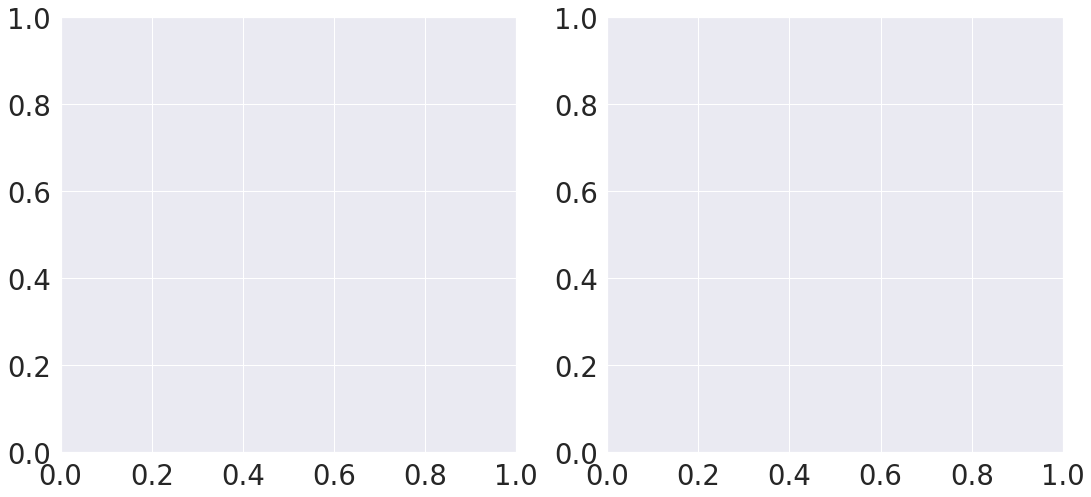

In [ ]:
f, ax = plt.subplots(1,2,figsize=(16,8))
sns.histplot(train.income_total,bins=20,ax=ax[0])
sns.violinplot(x='credit',y='income_total',data=train)

ValueError: ignored

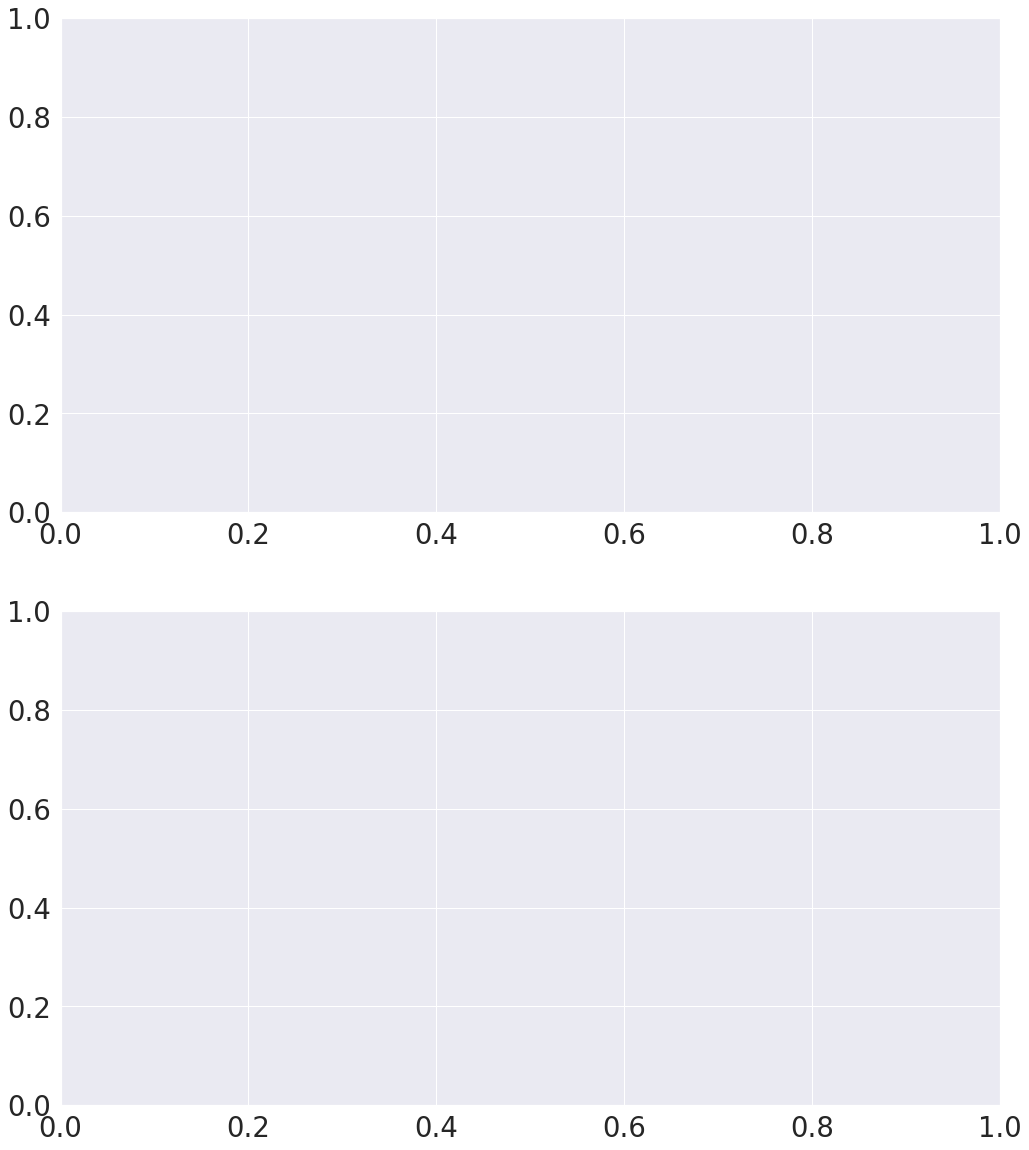

In [ ]:
f,ax = plt.subplots(2,1,figsize=(15,20))
sns.violinplot('income_type','income_total',hue='credit',data=train,ax=ax[1])
ax[1].set_title('income_type, income_total VS Credit Violinplot')
ax[1].tick_params(rotation=90,axis='x')

sns.violinplot('credit','income_total',hue='income_type',data=train,ax=ax[0])
ax[0].set_title('income_type, income_total VS Credit Violinplot')

##  occyp_type, edu_type VS Credit
- occyp_type은 일차적으로 결측치가 있는 데이터이기 때문에 결측치를 어떻게 판단할지가 중요함
- income_type을 통해서 가장먼저 유추해볼 수 있을 것이라고 판단됨
- 그리고 카테고리가 너무 많음, 이것들을 축약시킬 수 있을 만한 방법도 생각해봐야 함  



-  가장 먼저 연금 받는 사람들은 은퇴자로 처리, 학생은 학생으로 처리하면됨
-  상업소득, 공무원?, working 카테고리는 카테고리 별 직업의  최빈값으로 처리하면 될 것 같다라는 생각을 함  



- edu_type에 따른 소득의 차이는 있는 것으로 보임
- 비율상 Academic degree가 신용도가 더 낮은 경향을 보임

In [ ]:
missing = train[train['occyp_type'].isna()]
ax, f = plt.subplots(1,1,figsize=(10,10))
sns.countplot('income_type',data=missing)
plt.xticks(rotation=90)

In [ ]:
com =train[train['income_type']=='Commercial associate']
work =train[train['income_type']=='Working']
sts =train[train['income_type']=='State servant']
f, ax = plt.subplots(3,1,figsize=(10,30))
sns.countplot(y='occyp_type',data=com,ax=ax[0])
ax[0].set_title('Commercial associate')
sns.countplot(y='occyp_type',data=work,ax=ax[1])
ax[1].set_title('Working')
sns.countplot(y='occyp_type',data=sts,ax=ax[2])
ax[2].set_title('State servant')

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y='occyp_type',data=train)

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y='edu_type',data=train)

In [ ]:
f,ax = plt.subplots(2,1,figsize=(15,20))
sns.violinplot('edu_type','income_total',hue='credit',data=train,ax=ax[1])
ax[1].set_title('edu_type, income_total VS Credit Violinplot')
ax[1].tick_params(rotation=90,axis='x')

sns.violinplot('credit','income_total',hue='edu_type',data=train,ax=ax[0])
ax[0].set_title('edu_type, income_total VS Credit Violinplot')

In [ ]:
f,ax = plt.subplots(1,2,figsize=(30,10))
sns.countplot('edu_type',hue='credit',data=train,ax=ax[1])
ax[1].set_title('edu_Type VS Credit Countplot')
ax[1].tick_params(rotation=90,axis='x')
ax[1].set_yscale('log')
sns.countplot('credit',hue='edu_type',data=train,ax=ax[0])
ax[0].set_title('edu_typeVS Credit Countplot')
ax[0].set_yscale('log')

## House_type


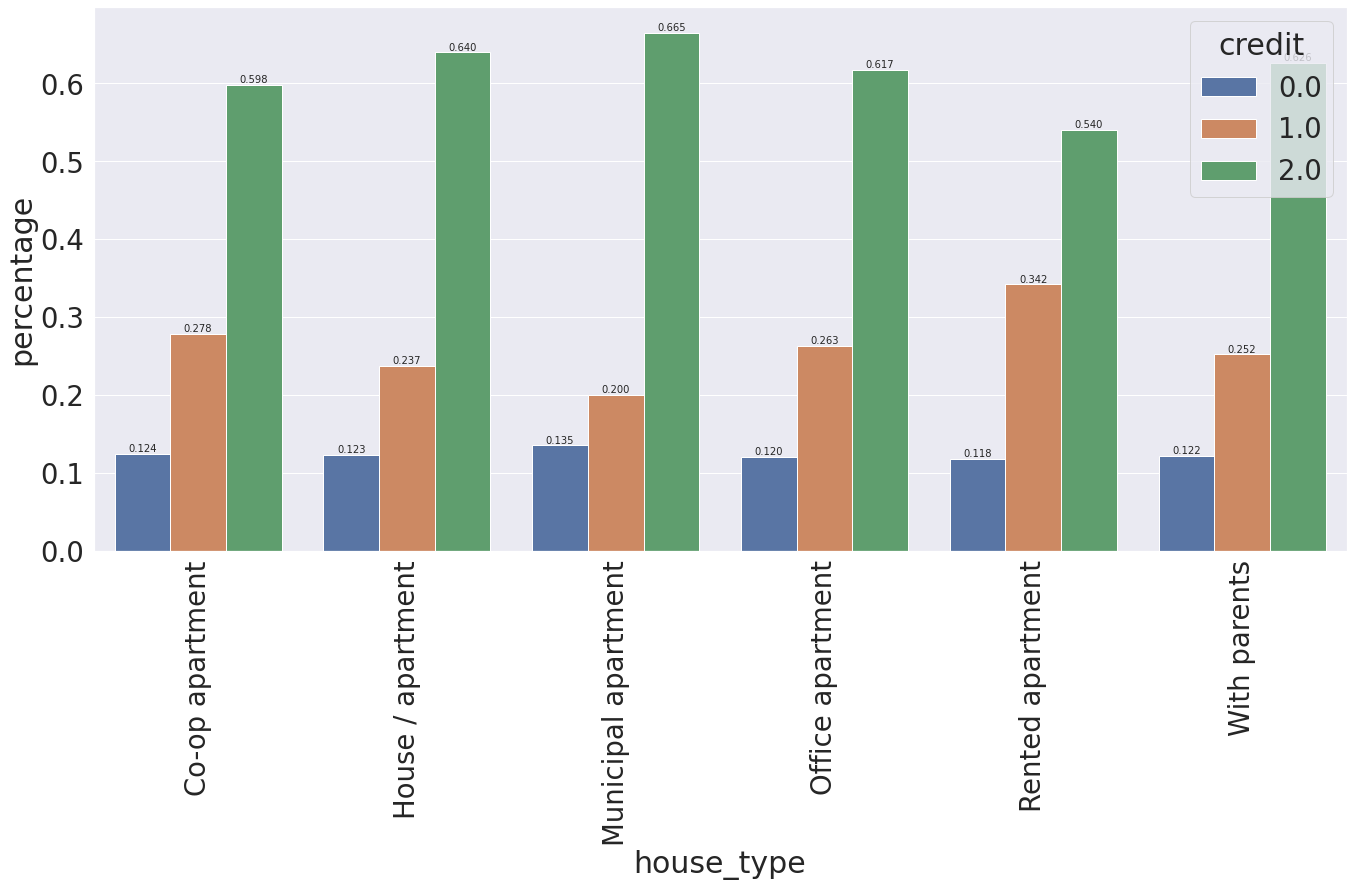

In [ ]:
group_count = (train.groupby(['house_type'])['credit']
              .value_counts(normalize=True)
              .rename('percentage')
              .round(3).reset_index()
              .sort_values(['house_type', 'credit']))
plt.figure(figsize=(20,10))
plot = sns.barplot(x='house_type',y='percentage', hue='credit',data=group_count)
ax = plot
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%.3f' % height, ha='center', va='bottom' )
plot.tick_params(labelrotation=90,axis='x')

# Check Dataset Conclusion

### 별 의미가 없다고 판단되는 feature
- FLAG_MOBIL
- phone
- work_phone
- email,gender
- DAYS_EMPLOYED

### 애매한 변수 (파악이 잘 안됨)
- house_type
- occyp_type
- child_num /family_size 서로 상관

### 그래도 의미가 그나마 있다고 판단되는 feature
- car
- reality
- family_type(과부)
- income_total
- income_type(연금,상업종사자)
- DAYS_BIRTH(age변수)
- begin_month (가장 강력한 변수, 연속형, 구분형 둘 다)
- edu_type


# Feature Engineering

## Duplicated Data

### Noise

In [ ]:
train = pd.read_csv(drive_path + 'open/train.csv')
test = pd.read_csv(drive_path + 'open/test.csv')
train.columns, train.shape

(Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
        'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
        'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
        'occyp_type', 'family_size', 'begin_month', 'credit'],
       dtype='object'), (26457, 20))

In [ ]:
#완전중복 제거
print('완전중복 개수', train[train.duplicated(train.columns[1:],keep=False)].shape[0])
#완전중복 첫번째만 빼고 제거
train = train.drop_duplicates(train.columns[1:],keep='first')
print('완전 중복 제거 후', train.shape[0])
y = train.iloc[:,-1]
y.shape

완전중복 개수 3155
완전 중복 제거 후 24823


(24823,)

In [ ]:
# 신용도 제외 모든 데이터가 같은 케이스 index 통일
noise = train[train.duplicated(train.columns[1:-1],keep=False)]
print('noise 추정 개수', noise.shape[0])
# noise 중 unique 고객 수 
dup1 = noise[~noise.duplicated(noise.columns[1:-1],keep='first')]
# noise 중 겹치는 고객 수 
dup2 = noise[noise.duplicated(noise.columns[1:-1],keep='first')]
print('noise 중 unique 고객 수', dup1.shape[0])
print('noise 중 겹치는 고객 수', dup2.shape[0])


noise 추정 개수 1425
noise 중 unique 고객 수 706
noise 중 겹치는 고객 수 719


### Duplicated

In [ ]:
col1 = ['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email','occyp_type','family_size']
# unique고객 중복고객 확인
print('unique customer:', train[~train.duplicated(col1,keep=False)].shape[0])
print('duplicated customer:', train[train.duplicated(col1,keep=False)].shape[0])

NameError: ignored

In [ ]:
train_unique = train[~train.duplicated(col1,keep=False)]
train_dup = train[train.duplicated(col1,keep=False)]
train_unique['dup'] = 0
train_dup['dup'] = 1

In [ ]:
col2 = ['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email','family_size','dup']

dup_ind = train_dup[~train_dup.duplicated(col2,keep='first')]['index']
plus_ind = train_dup[train_dup.duplicated(col2,keep='first')]['index']

print('credit begin_month 제외 unique customer among duplicated:', train_dup[~train_dup.duplicated(col2,keep='first')].shape[0])
print('credit begin_month 제외 duplicated all:', train_dup[train_dup.duplicated(col2,keep='first')].shape[0])

print('총 unique:',train[~train.duplicated(col1,keep=False)].shape[0] + train_dup[~train_dup.duplicated(col2,keep='first')].shape[0])
print('총 중복 인원:', train_dup[train_dup.duplicated(col2,keep='first')].shape[0])

credit begin_month 제외 unique customer among duplicated: 5410
credit begin_month 제외 duplicated all: 16064
총 unique: 8759
총 중복 인원: 16064


In [ ]:
print('Days_Birth만 unique customer among duplicated:', train_dup[~train_dup.duplicated(['DAYS_BIRTH'],keep='first')].shape[0])
print('Days_Birth만 duplicated all:', train_dup[train_dup.duplicated(['DAYS_BIRTH'],keep='first')].shape[0])

Days_Birth만 unique customer among duplicated: 4545
Days_Birth만 duplicated all: 16929


In [ ]:
# 이렇게 했을 때 모든 칼럼을 사용해서 중복 분류했을 때와 값이 같아짐
print('Feature 네개 사용 unique customer among duplicated:', train_dup[~train_dup.duplicated(['DAYS_BIRTH','DAYS_EMPLOYED','income_total','family_type'],keep='first')].shape[0])
print('Feature 네개 사용 duplicated all:', train_dup[train_dup.duplicated(['DAYS_BIRTH','DAYS_EMPLOYED','income_total','family_type'],keep='first')].shape[0])

Feature 네개 사용 unique customer among duplicated: 4895
Feature 네개 사용 duplicated all: 16579


## Feature PLUS (ID,CARDS,last issue)

In [ ]:
def add_id_card(X):
  data = X.copy()
  columns = list(data.columns)
  columns.remove('begin_month')
  no_month_X = data.loc[:, columns]
  one_card = no_month_X [ ~no_month_X.duplicated( columns, keep=False ) ] # Users with One Card

  dup = data [ data.duplicated( columns, keep=False ) ] # Data with more than One
  dup_card = dup [ ~dup.duplicated(columns, keep='first') ].copy() # Unique user set with more than One
  # Make user dictionary
  # first-shown-user-index : [ duplicated-user-indices ]
  bank = {}
  for i in dup_card.index:
    dcol = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'income_total','family_type', 'gender']
    bank[i] = dup.index[(dup.loc[:, dcol] == dup_card.loc[i, dcol]).all(axis=1)].tolist()
  # Make Columns for ID, CARDS
  data['ID'] = np.zeros((data.shape[0],))
  data['CARDS'] = np.zeros((data.shape[0],))
  data['LastIssue'] = np.zeros((data.shape[0],))
  for key in bank.keys():
    count = 1
    months = data.loc[bank[key], 'begin_month']
    indices = months.iloc[months.argsort().values].index # Sort Duplicates with begin_month
    for i, k in enumerate(indices):
      data.loc[k, 'CARDS'] = count
      count+=1
      if i == 0: # First Issue = -1
        data.loc[k, 'LastIssue'] = -1
        last_month = months[k]
        id=k
      else: # Period from Last Issue
        data.loc[k, 'LastIssue'] = months[k] - last_month
        last_month = months[k]
      data.loc[k, 'ID'] = data.loc[k, 'gender'] + str(id).zfill(5) # ID : gender + first-shown-user-index
  for i in one_card.index:
    data.loc[i, 'ID'] = data.loc[i, 'gender'] + str(i).zfill(5)
    data.loc[i, 'CARDS'] = 1
    data.loc[k, 'LastIssue'] = -1
  return data[['ID'] + columns + ['CARDS', 'LastIssue', 'begin_month']] 

In [ ]:
X = train.iloc[:,1:-1]
X = add_id_card(X)
train = X
train.shape

(24823, 21)

In [ ]:
train['credit'] = y
train.head(5)

,ID,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,CARDS,LastIssue,begin_month,credit
0,F17641,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,5.0,19.0,-6.0,1.0
1,F22469,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,5.0,1.0,-5.0,1.0
2,M08235,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,4.0,7.0,-22.0,2.0
3,F09484,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,2.0,15.0,-37.0,0.0
4,F00004,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,1.0,0.0,-26.0,2.0


In [ ]:
df= train.copy()
df

,ID,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,CARDS,LastIssue,begin_month,credit
0,F17641,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,5.0,19.0,-6.0,1.0
1,F22469,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,5.0,1.0,-5.0,1.0
2,M08235,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,4.0,7.0,-22.0,2.0
3,F09484,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,2.0,15.0,-37.0,0.0
4,F00004,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,1.0,0.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F13813,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,5.0,2.0,-2.0,1.0
26453,F26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,1.0,0.0,-47.0,2.0
26454,F26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,1.0,0.0,-25.0,2.0
26455,M26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,1.0,0.0,-59.0,2.0


#### 완전 기본 모델 생성

In [ ]:
from sklearn.preprocessing import OneHotEncoder
train.fillna('NAN', inplace=True)
object_col = []
for col in train.columns:
    if train[col].dtype == 'object':
        object_col.append(col)
object_col.remove('ID')
object_col

['gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'occyp_type']

In [ ]:
train.index = range(train.shape[0])
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NAN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NAN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [ ]:
enc = OneHotEncoder()
enc.fit(train.loc[:,object_col])


train_onehot_df = pd.DataFrame(enc.transform(train.loc[:,object_col]).toarray(), 
             columns=enc.get_feature_names(object_col))
train.drop(object_col, axis=1, inplace=True)
train = pd.concat([train, train_onehot_df], axis=1)
train

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_NAN,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,0,202500.0,-13899,-4709,1,0,0,0,2.0,-6.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,247500.0,-11380,-1540,1,0,0,1,3.0,-5.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0,450000.0,-19087,-4434,1,0,1,0,2.0,-22.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0,202500.0,-15088,-2092,1,0,1,0,2.0,-37.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4,0,157500.0,-15037,-2105,1,0,0,0,2.0,-26.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,2,225000.0,-12079,-1984,1,0,0,0,4.0,-2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26453,26453,1,180000.0,-15291,-2475,1,0,0,0,2.0,-47.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26454,26454,0,292500.0,-10082,-2015,1,0,0,0,2.0,-25.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26455,26455,0,171000.0,-10145,-107,1,0,0,0,1.0,-59.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = train.loc[:,['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month','gender_F', 'gender_M', 'car_N',
       'car_Y', 'reality_N', 'reality_Y', 'income_type_Commercial associate',
       'income_type_Pensioner', 'income_type_State servant',
       'income_type_Student', 'income_type_Working',
       'edu_type_Academic degree', 'edu_type_Higher education',
       'edu_type_Incomplete higher', 'edu_type_Lower secondary',
       'edu_type_Secondary / secondary special', 'family_type_Civil marriage',
       'family_type_Married', 'family_type_Separated',
       'family_type_Single / not married', 'family_type_Widow',
       'house_type_Co-op apartment', 'house_type_House / apartment',
       'house_type_Municipal apartment', 'house_type_Office apartment',
       'house_type_Rented apartment', 'house_type_With parents',
       'occyp_type_Accountants', 'occyp_type_Cleaning staff',
       'occyp_type_Cooking staff', 'occyp_type_Core staff',
       'occyp_type_Drivers', 'occyp_type_HR staff',
       'occyp_type_High skill tech staff', 'occyp_type_IT staff',
       'occyp_type_Laborers', 'occyp_type_Low-skill Laborers',
       'occyp_type_Managers', 'occyp_type_Medicine staff', 'occyp_type_NAN',
       'occyp_type_Private service staff', 'occyp_type_Realty agents',
       'occyp_type_Sales staff', 'occyp_type_Secretaries',
       'occyp_type_Security staff', 'occyp_type_Waiters/barmen staff']]
y = train['credit']

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
folds=[]
for train_idx, valid_idx in skf.split(train_, train_['credit']):
    folds.append((train_idx, valid_idx))
len(folds[0][0]),len(folds[0][1]),len(folds[1][0]),len(folds[1][1])

(19858, 4965, 19858, 4965)

In [ ]:
import random
random.seed(42)
lgb_models={}
for fold in range(5):
    print(f'===================================={fold+1}============================================')
    train_idx, valid_idx = folds[fold]
    X_train, X_valid, y_train, y_valid = X.iloc[train_idx].values, X.iloc[valid_idx].values, y[train_idx].values, y[valid_idx].values 
    lgb = LGBMClassifier(n_estimators=1000,)
    lgb.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], 
            early_stopping_rounds=30,
            verbose=100)
    lgb_models[fold]=lgb
    print(f'================================================================================\n\n')

====================================1============================================
Training until validation scores don't improve for 30 rounds.
[100]	training's multi_logloss: 0.671598	valid_1's multi_logloss: 0.7731
[200]	training's multi_logloss: 0.596607	valid_1's multi_logloss: 0.7619
[300]	training's multi_logloss: 0.538999	valid_1's multi_logloss: 0.760126
Early stopping, best iteration is:
[281]	training's multi_logloss: 0.54926	valid_1's multi_logloss: 0.759903


====================================2============================================
Training until validation scores don't improve for 30 rounds.
[100]	training's multi_logloss: 0.672076	valid_1's multi_logloss: 0.756975
[200]	training's multi_logloss: 0.595027	valid_1's multi_logloss: 0.742824
[300]	training's multi_logloss: 0.53774	valid_1's multi_logloss: 0.740024
[400]	training's multi_logloss: 0.490947	valid_1's multi_logloss: 0.738993
Early stopping, best iteration is:
[393]	training's multi_logloss: 0.493909	valid

## DAYS_BIRTH, DAYS_EMPLOYED, begin_month (Check data)
- 확실히 보기에는 나이대로 바꾸는게 좋음
- 20대 60대에 비해 확실하게 30,40,50대에 신용도가 낮은 사람들이 상대적으로 많은 것을 알 수 있음
- 나이는 추후에 연금여부와 교호작용항을 만들면 더 효과가 있을 수 있다고 생각이 들었음


In [ ]:
# 나이 변환
train['age']= (train['DAYS_BIRTH']*(-1)) // (365) 
train['age'].max()

68

In [ ]:
#나이 범주 
labels={1:'20s',2:'30s',3:'40s',4:'50s',5:'60+'}
bins = [20,30,40,50,60,999]
train['age_bin'] = np.digitize(train['age'],bins=bins)
train[['age','age_bin']]

,age,age_bin
0,38,2
1,31,2
2,52,4
3,41,3
4,41,3
...,...,...
26452,33,2
26453,41,3
26454,27,1
26455,27,1


In [ ]:
#나이에 따른 가중치 
score_labels={1: 69, 2: 77, 3: 84, 4: 93, 5: 104, 6: 110}
bins = [20,25,30,35,42,50,999]
train['age_score'] = np.digitize(train['age'],bins=bins)
train['age_score'].replace(score_labels,inplace=True)
train[['age','age_bin','age_score']]

,age,age_bin,age_score
0,38,2,93
1,31,2,84
2,52,4,110
3,41,3,93
4,41,3,93
...,...,...,...
26452,33,2,84
26453,41,3,93
26454,27,1,77
26455,27,1,77


In [ ]:
# 고용일 변환 
train['DAYS_EMPLOYED'].replace(365243,0,inplace=True)
train['employ_month'] = (train['DAYS_EMPLOYED']*(-1)) // (30)

score_labels={1: 20, 2: 24, 3: 29, 4: 36}
bins = [0,13,37,72,999]
train['employ_score'] = np.digitize(train['employ_month'],bins=bins)
train['employ_score'].replace(score_labels,inplace=True)
train[['DAYS_EMPLOYED','employ_month','employ_score']]

,DAYS_EMPLOYED,employ_month,employ_score
0,-4709,156,36
1,-1540,51,29
2,-4434,147,36
3,-2092,69,29
4,-2105,70,29
...,...,...,...
26452,-1984,66,29
26453,-2475,82,36
26454,-2015,67,29
26455,-107,3,20


In [ ]:
# 신용카드 사용일자 월단위 변환
train['begin_month'] = (train['begin_month']*(-1))
train['begin_month']

0         6.0
1         5.0
2        22.0
3        37.0
4        26.0
         ... 
26452     2.0
26453    47.0
26454    25.0
26455    59.0
26456     9.0
Name: begin_month, Length: 24823, dtype: float64

In [ ]:
train['begin_bin'] = 0
train['begin_bin'][(train['begin_month']>=0)&(train['begin_month']<=3)]=0
train['begin_bin'][train['begin_month'] >= 4]=1
train['begin_bin'].value_counts()

1    23218
0     1605
Name: begin_bin, dtype: int64

### age,age_bin

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text major ticklabel objects>)

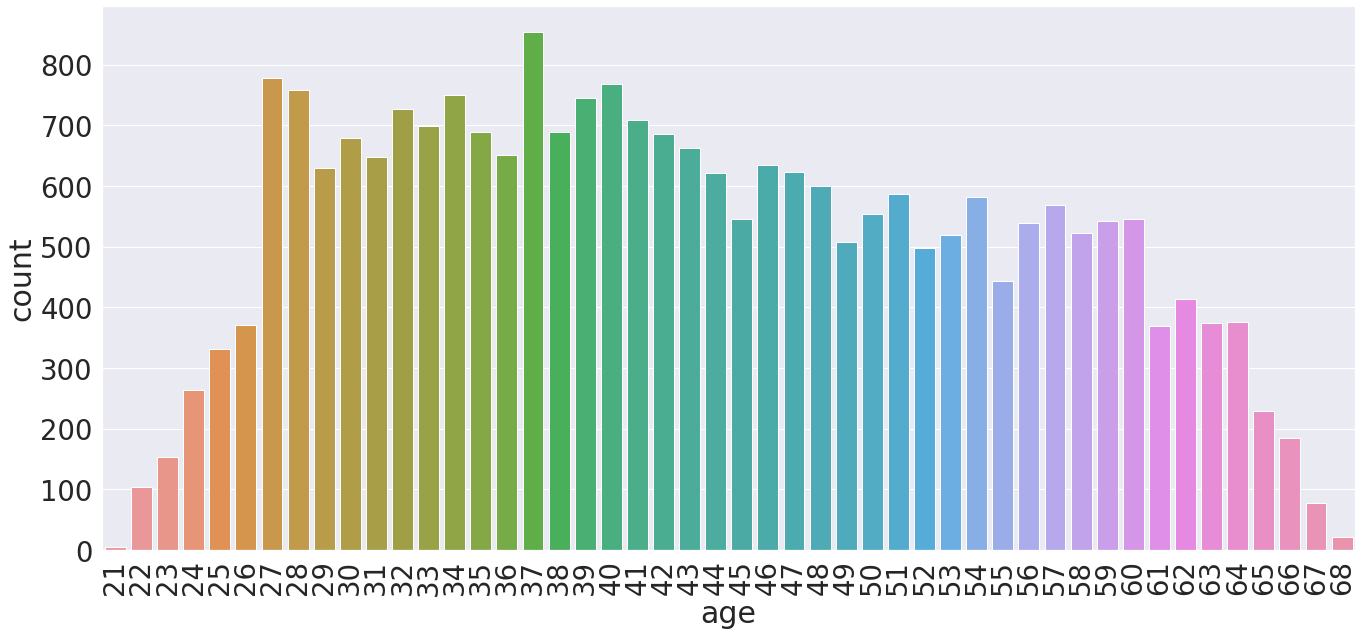

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot('age',data=train)
plt.xticks(rotation=90)

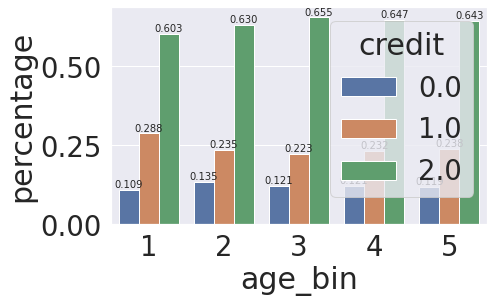

In [ ]:
group_count = (train.groupby(['age_bin'])['credit']
              .value_counts(normalize=True)
              .rename('percentage')
              .round(3).reset_index()
              .sort_values(['age_bin', 'credit']))
plot = sns.barplot(x='age_bin',y='percentage', hue='credit',data=group_count)
ax = plot
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%.3f' % height, ha='center', va='bottom')

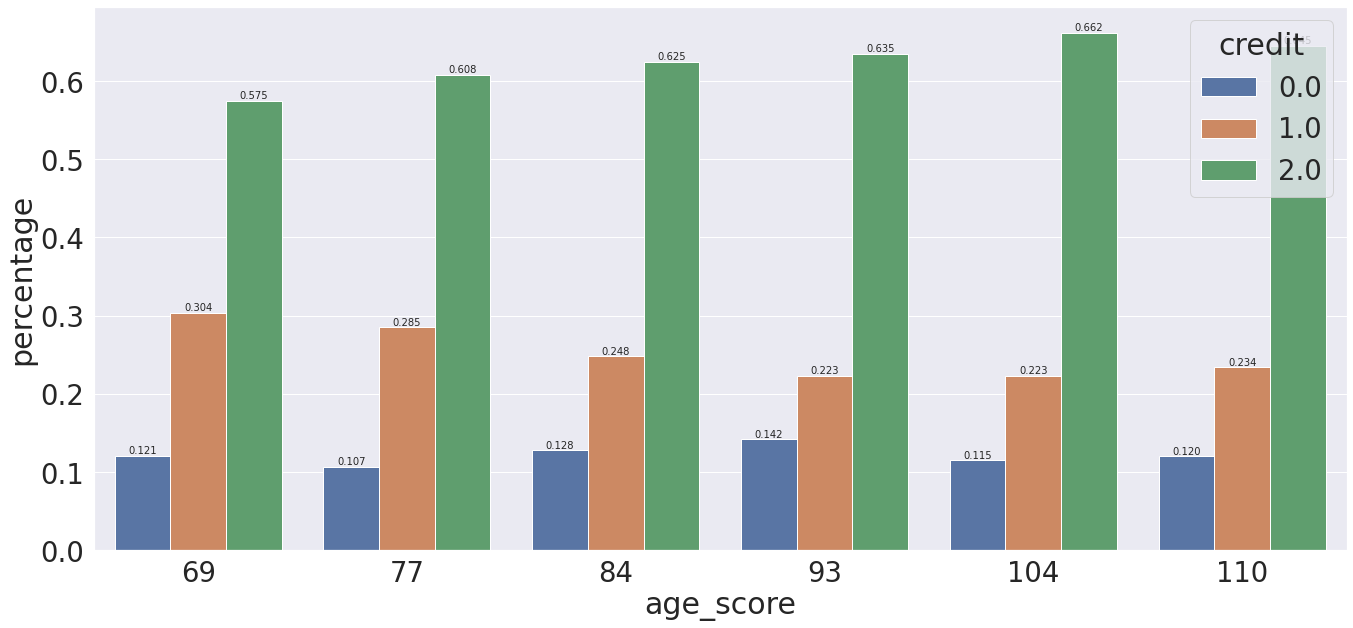

In [ ]:
group_count = (train.groupby(['age_score'])['credit']
              .value_counts(normalize=True)
              .rename('percentage')
              .round(3).reset_index()
              .sort_values(['age_score', 'credit']))
plt.figure(figsize=(20,10))
plot = sns.barplot(x='age_score',y='percentage', hue='credit',data=group_count)
ax = plot
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%.3f' % height, ha='center', va='bottom' )


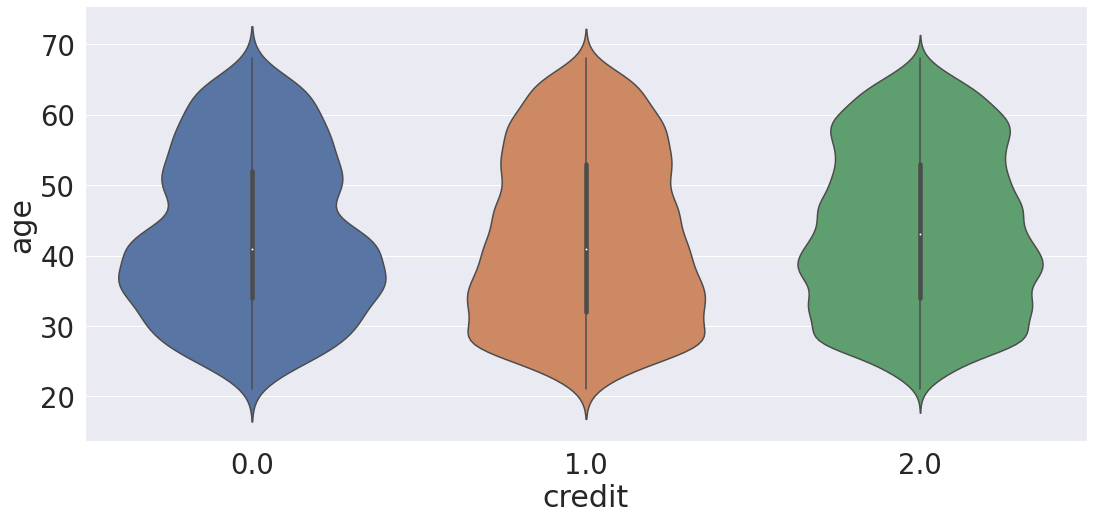

In [ ]:
plt.figure(figsize=(16,8))
sns.violinplot(y='age',x='credit',data=train)

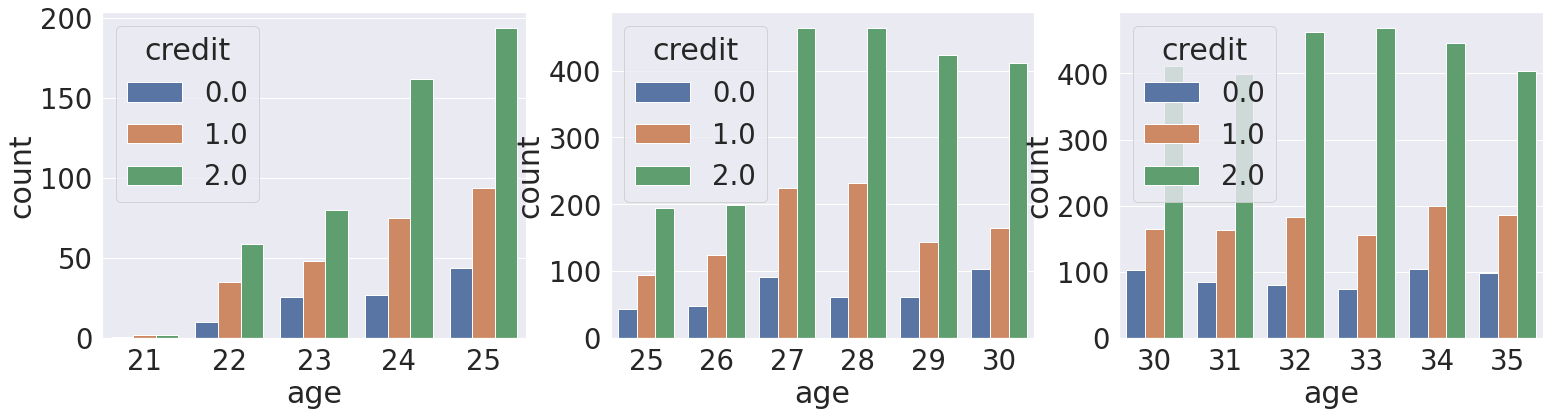

In [ ]:
f,ax = plt.subplots(1,3,figsize=(23,6))
sns.countplot(data = train[(train.age>=20)&(train.age<=25)],hue='credit',x='age',ax=ax[0])
sns.countplot(data = train[(train.age>=25)&(train.age<=30)],hue='credit',x='age',ax=ax[1])
sns.countplot(data = train[(train.age>=30)&(train.age<=35)],hue='credit',x='age',ax=ax[2])

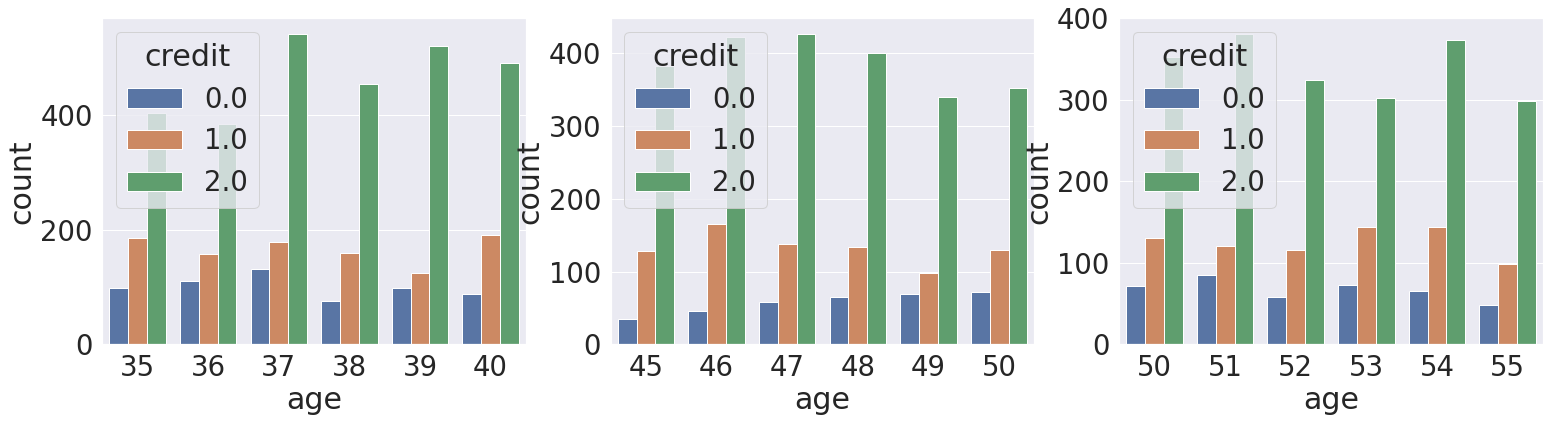

In [ ]:
f,ax = plt.subplots(1,3,figsize=(23,6))
sns.countplot(data = train[(train.age>=35)&(train.age<=40)],hue='credit',x='age',ax=ax[0])
sns.countplot(data = train[(train.age>=45)&(train.age<=50)],hue='credit',x='age',ax=ax[1])
sns.countplot(data = train[(train.age>=50)&(train.age<=55)],hue='credit',x='age',ax=ax[2])

### begin_month, employ_month
- 확실히 신용카드를 만든 기간이 얼마 안될수록 신용도가 높은 경우가 더 많은 것을 알 수 있었음
- 고용기간은 생각보다 신용도에 큰 변화를 만들지 못하는 것으로 보임

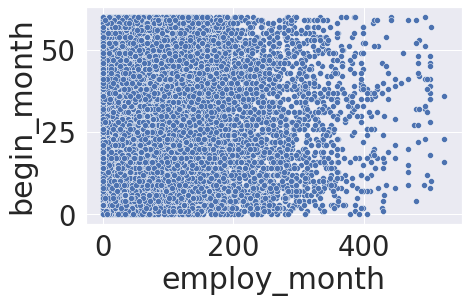

In [ ]:
sns.scatterplot(train.employ_month,train.begin_month)

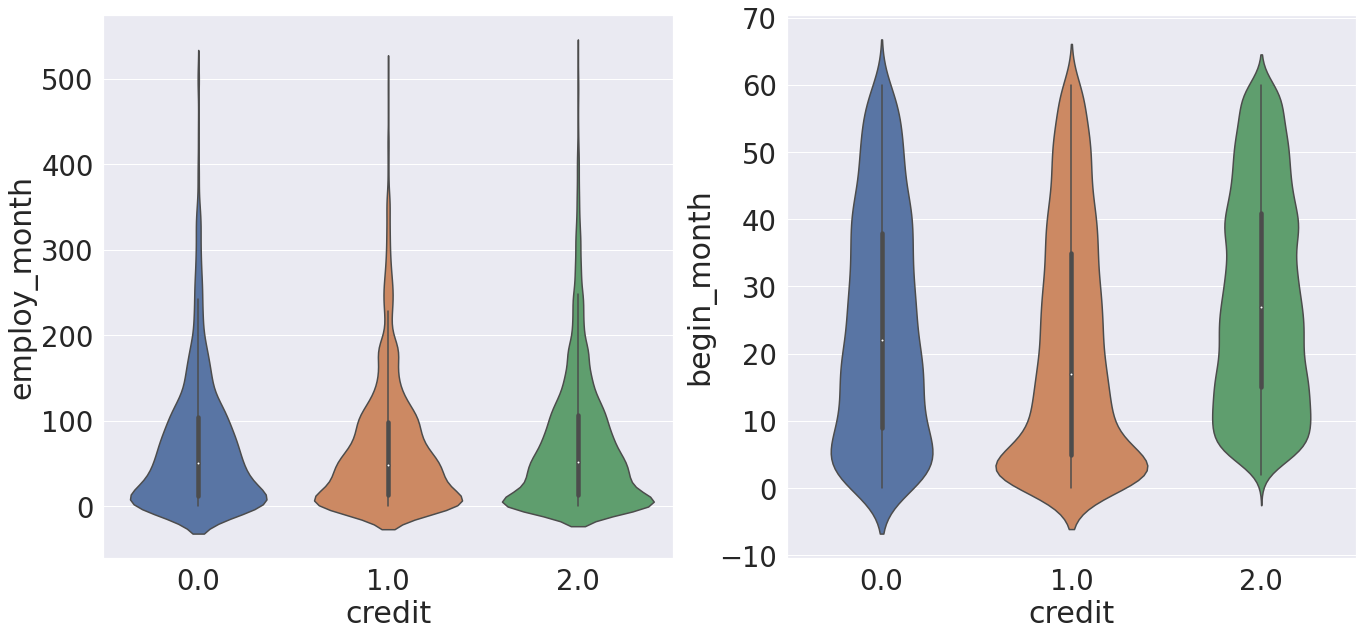

In [ ]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.violinplot(x='credit',y='employ_month',data=train,ax=ax[0])
sns.violinplot(x='credit',y='begin_month',data=train,ax=ax[1])

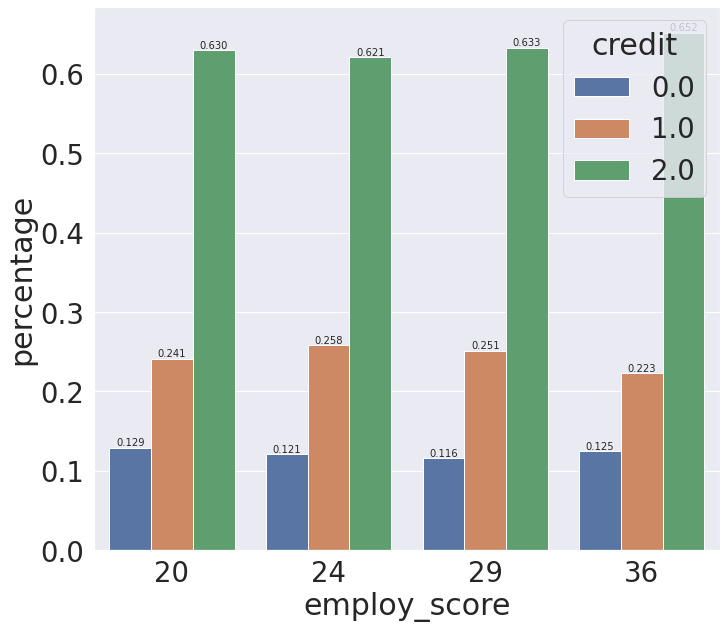

In [ ]:
group_count = (train.groupby(['employ_score'])['credit']
              .value_counts(normalize=True)
              .rename('percentage')
              .round(3).reset_index()
              .sort_values(['employ_score', 'credit']))

plt.figure(figsize=(10,10))

plot = sns.barplot(x='employ_score',y='percentage', hue='credit',data=group_count)
ax = plot
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%.3f' % height, ha='center', va='bottom')

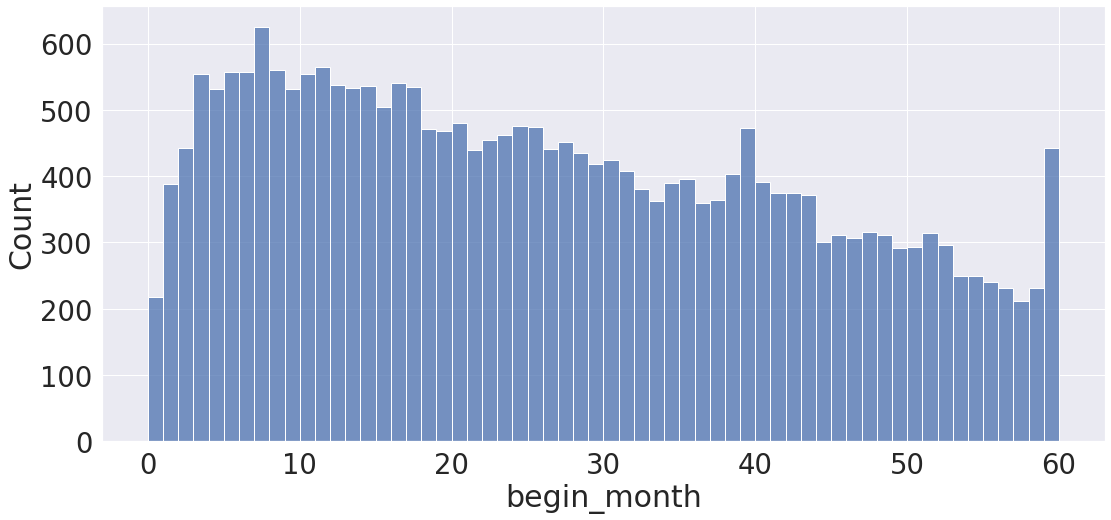

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(train['begin_month'],bins=60)

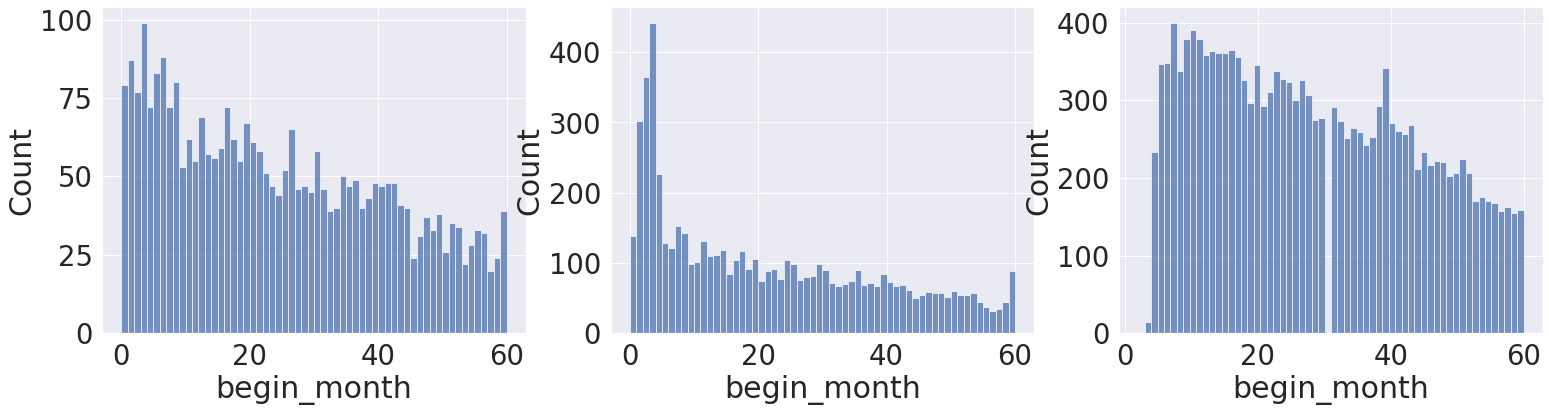

In [ ]:
f,ax = plt.subplots(1,3,figsize=(23,6))
sns.histplot(train['begin_month'][train.credit==0],bins=60,ax=ax[0])
sns.histplot(train['begin_month'][train.credit==1],bins=60,ax=ax[1])
sns.histplot(train['begin_month'][train.credit==2],bins=60,ax=ax[2])

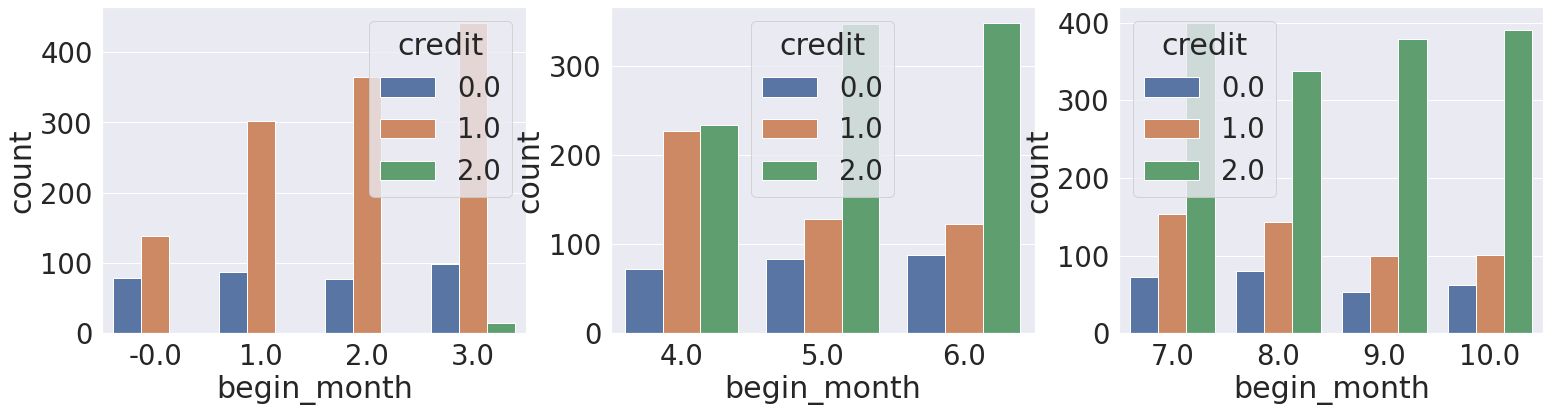

In [ ]:
f,ax = plt.subplots(1,3,figsize=(23,6))
sns.countplot(data = train[(train.begin_month>=0)&(train.begin_month<=3)],hue='credit',x='begin_month',ax=ax[0])
sns.countplot(data = train[(train.begin_month>=4)&(train.begin_month<=6)],hue='credit',x='begin_month',ax=ax[1])
sns.countplot(data = train[(train.begin_month>=7)&(train.begin_month<=10)],hue='credit',x='begin_month',ax=ax[2])

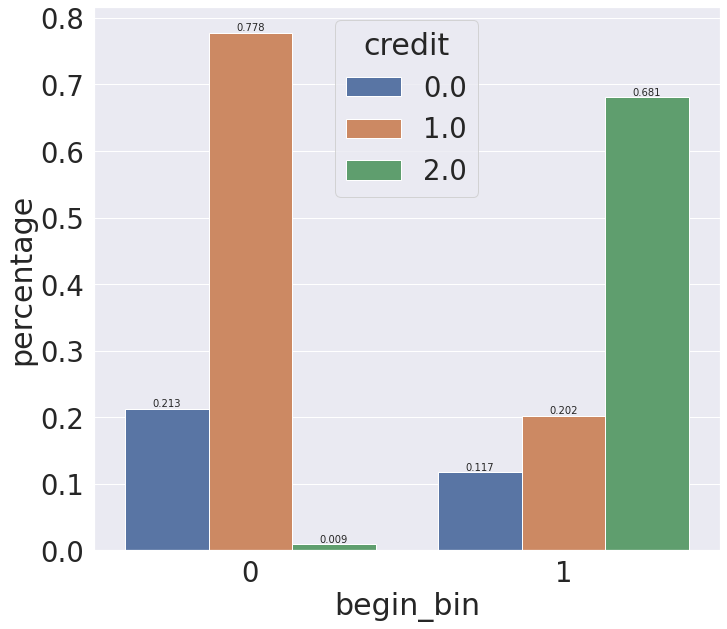

In [ ]:
group_count = (train.groupby(['begin_bin'])['credit']
              .value_counts(normalize=True)
              .rename('percentage')
              .round(3).reset_index()
              .sort_values(['begin_bin', 'credit']))

plt.figure(figsize=(10,10))

plot = sns.barplot(x='begin_bin',y='percentage', hue='credit',data=group_count)
ax = plot
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%.3f' % height, ha='center', va='bottom')

## Car, Reality 
- gender, FLAG_MOBIL,phone, work_phone,email은 크게 의미가 없는 피쳐라 판단
- car, reality값을 0과 1로 더미화 시킴

In [ ]:
train['car'].replace({'N':0,'Y':1},inplace=True)
train['car']

0        0
1        0
2        1
3        0
4        1
        ..
26452    0
26453    0
26454    1
26455    0
26456    0
Name: car, Length: 24823, dtype: int64

In [ ]:
train['reality'].replace({'N':0,'Y':1},inplace=True)
train['reality']

0        0
1        1
2        1
3        1
4        1
        ..
26452    0
26453    1
26454    0
26455    1
26456    0
Name: reality, Length: 24823, dtype: int64

## child_num, family_size
- child_num과 family_size가 가정에 비해 비정상으로 큰 경우의 수를 제외
- child_num은 3이상을 모두 묶고, family_size는 5이상을 모두 묶는다.
- family_size가 child_num보다 작거나 같으면 잘못된 데이터라 판단하고 자름
- 경제활동 인구 변수 produce pop


In [ ]:
train_adj = train[train['child_num']<11]

In [ ]:
train_adj = train_adj[train_adj['child_num'] < train_adj['family_size']]

In [ ]:
train_adj['produce_pop'] = train_adj['family_size'] - train_adj['child_num'] 

In [ ]:
train_adj.shape, train.shape

((24813, 29), (24823, 28))

In [ ]:
train_adj['child_num'][train_adj['child_num']>=3] = 3
train_adj['family_size'][train_adj['family_size']>=5] = 5

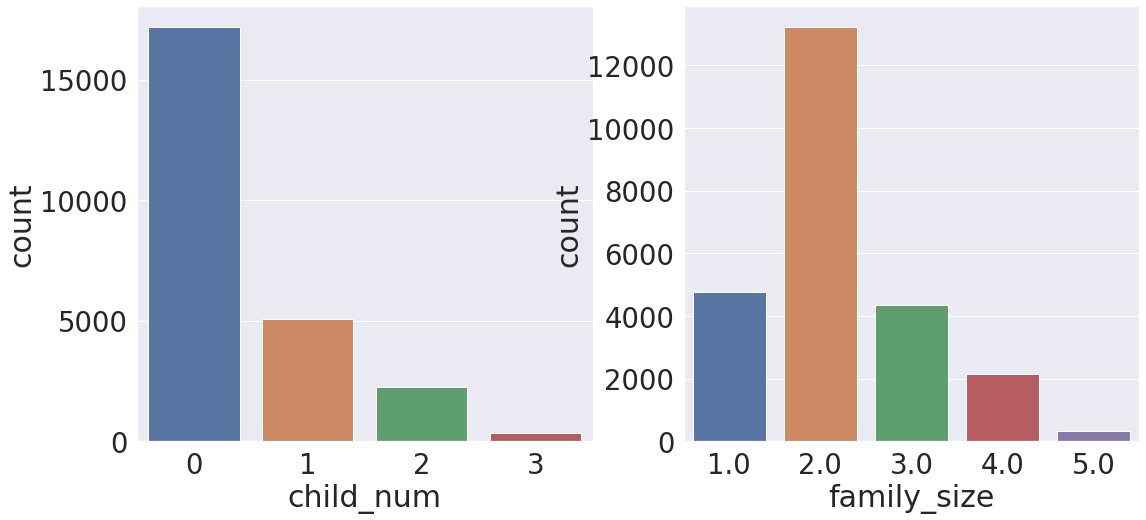

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.countplot('child_num',data = train_adj,ax=ax[0])
sns.countplot('family_size',data = train_adj,ax=ax[1])

In [ ]:
pd.crosstab(train_adj['child_num'], train_adj['family_size'], margins=True).style.background_gradient(cmap='summer_r')

family_size,1.0,2.0,3.0,4.0,5.0,All
child_num,,,,,,
0,4781,12392,0,0,0,17173
1,0,830,4235,0,0,5065
2,0,0,114,2117,0,2231
3,0,0,0,19,325,344
All,4781,13222,4349,2136,325,24813


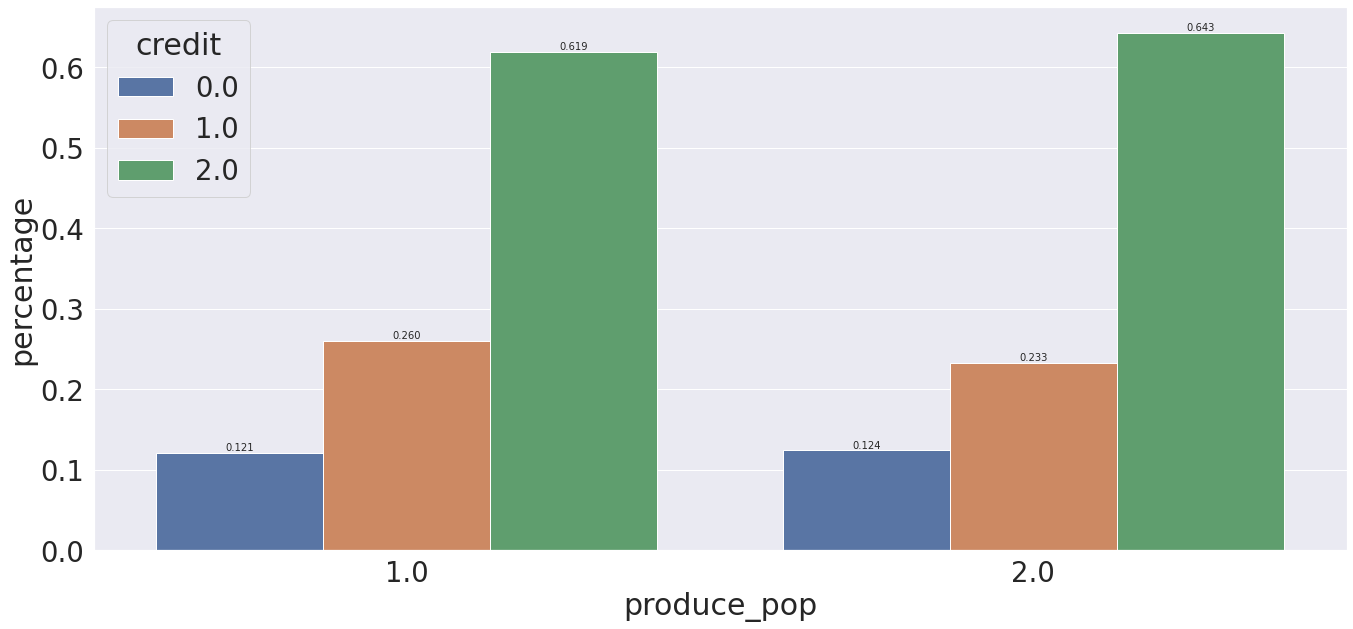

In [ ]:
group_count = (train_adj.groupby(['produce_pop'])['credit']
              .value_counts(normalize=True)
              .rename('percentage')
              .round(3).reset_index()
              .sort_values(['produce_pop', 'credit']))
plt.figure(figsize=(20,10))
plot = sns.barplot(x='produce_pop',y='percentage', hue='credit',data=group_count)
ax = plot
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%.3f' % height, ha='center', va='bottom' )


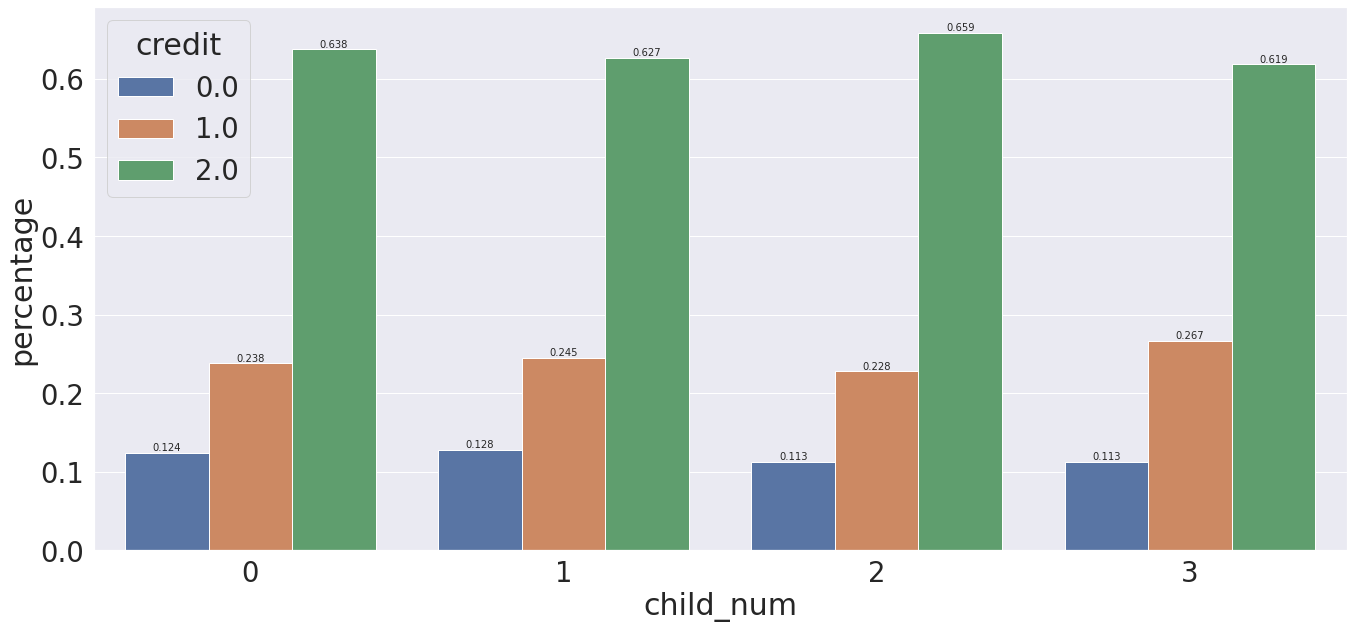

In [ ]:
group_count = (train_adj.groupby(['child_num'])['credit']
              .value_counts(normalize=True)
              .rename('percentage')
              .round(3).reset_index()
              .sort_values(['child_num', 'credit']))
plt.figure(figsize=(20,10))
plot = sns.barplot(x='child_num',y='percentage', hue='credit',data=group_count)
ax = plot
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%.3f' % height, ha='center', va='bottom' )


## edu_type mapping 및 병합
- 교육 수준은 양적으로 볼 수 있다고 판단하여 일단 교육수준이 높을수록 높은 값을 할당
- 'Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree' 순으로 1,2,3,4,5 매핑

In [ ]:
train_adj['edu_type']

0                     Higher education
1        Secondary / secondary special
2                     Higher education
3        Secondary / secondary special
4                     Higher education
                     ...              
26452    Secondary / secondary special
26453                 Higher education
26454    Secondary / secondary special
26455                Incomplete higher
26456    Secondary / secondary special
Name: edu_type, Length: 24813, dtype: object

In [ ]:
edu_dic = {'Lower secondary':1, 'Secondary / secondary special':2, 'Incomplete higher':3, 'Higher education':4, 'Academic degree':5}
train_adj['edu_type'].replace(edu_dic,inplace=True)
train_adj['edu_type']

0        4
1        2
2        4
3        2
4        4
        ..
26452    2
26453    4
26454    2
26455    3
26456    2
Name: edu_type, Length: 24813, dtype: int64

In [ ]:
train_adj['edu_type'].value_counts()

2    16862
4     6725
3      963
1      242
5       21
Name: edu_type, dtype: int64

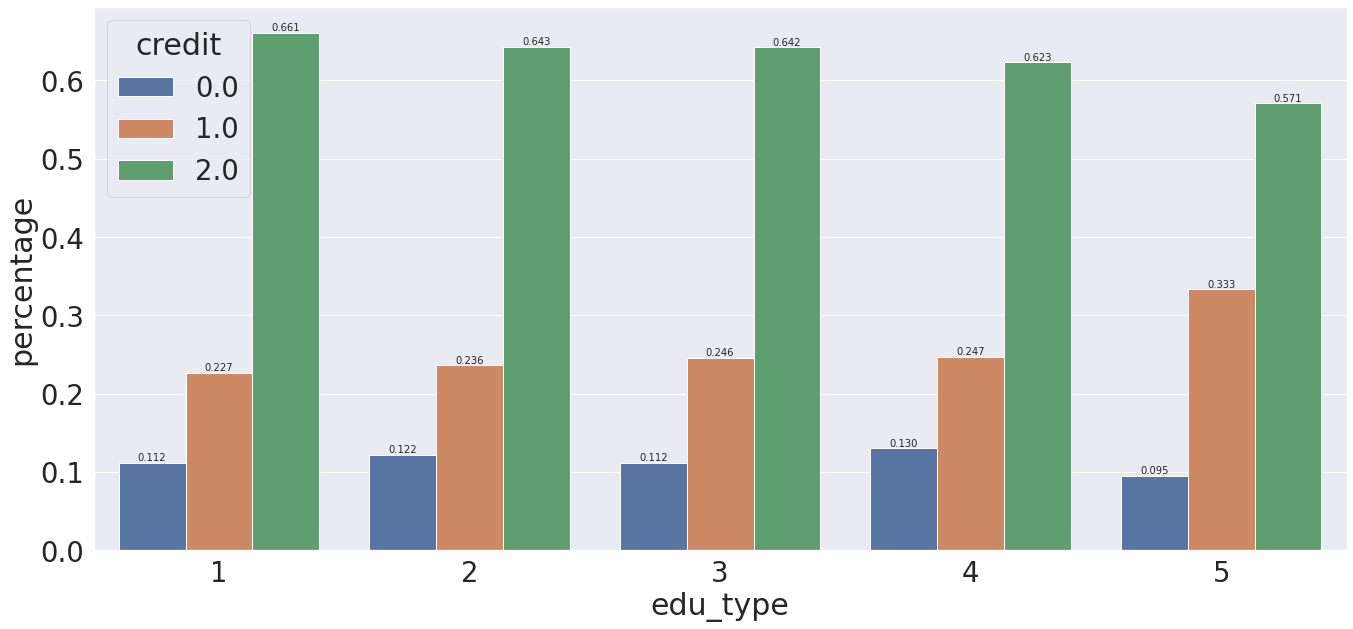

In [ ]:
group_count = (train_adj.groupby(['edu_type'])['credit']
              .value_counts(normalize=True)
              .rename('percentage')
              .round(3).reset_index()
              .sort_values(['edu_type', 'credit']))
plt.figure(figsize=(20,10))
plot = sns.barplot(x='edu_type',y='percentage', hue='credit',data=group_count)
ax = plot
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%.3f' % height, ha='center', va='bottom' )


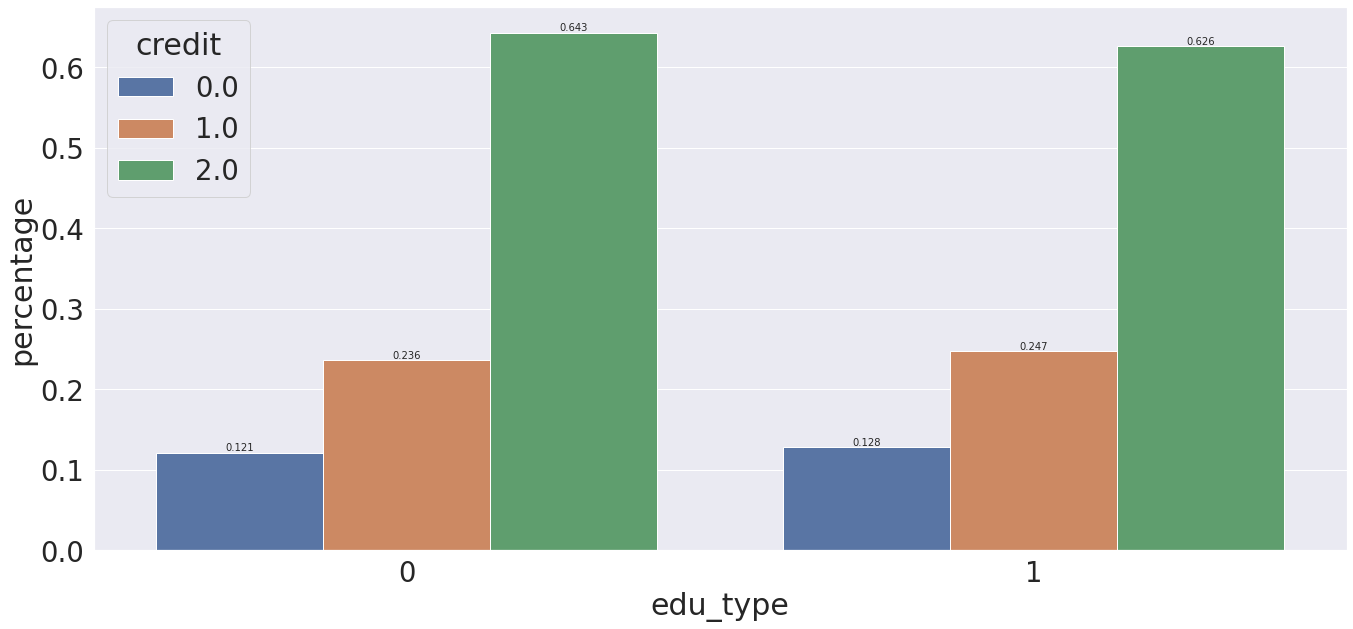

In [ ]:
''' edu_type 축소는 보류
train_adj['edu_type'][train_adj['edu_type']<=2] = 0
train_adj['edu_type'][train_adj['edu_type']>2] = 1
group_count = (train_adj.groupby(['edu_type'])['credit']
              .value_counts(normalize=True)
              .rename('percentage')
              .round(3).reset_index()
              .sort_values(['edu_type', 'credit']))
plt.figure(figsize=(20,10))
plot = sns.barplot(x='edu_type',y='percentage', hue='credit',data=group_count)
ax = plot
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%.3f' % height, ha='center', va='bottom' )
'''

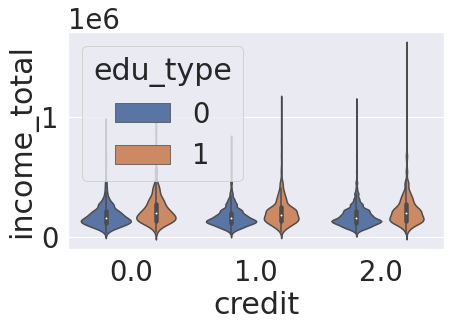

In [ ]:
# sns.countplot('edu_type',hue='credit',data=train_adj)
sns.violinplot('credit','income_total',hue='edu_type',data=train_adj)

## family_type 병합

In [ ]:
train_adj['family_type'].value_counts()

Married                 17056
Single / not married     3281
Civil marriage           1992
Separated                1446
Widow                    1038
Name: family_type, dtype: int64

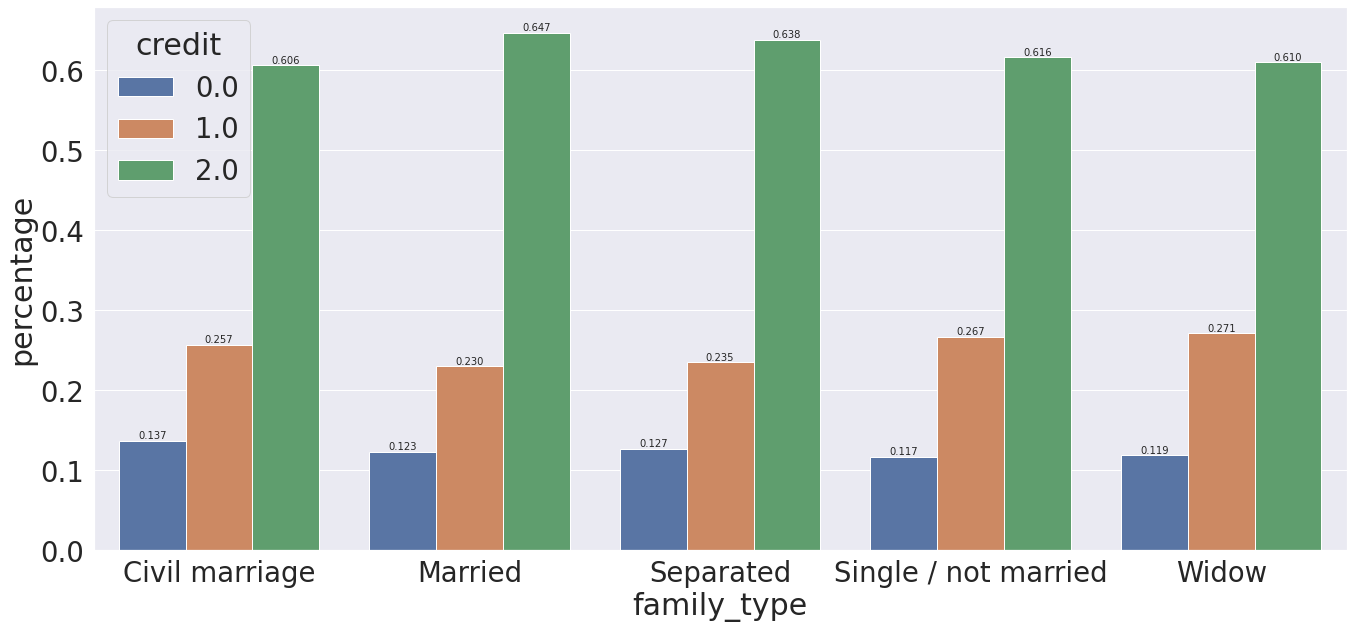

In [ ]:
group_count = (train_adj.groupby(['family_type'])['credit']
              .value_counts(normalize=True)
              .rename('percentage')
              .round(3).reset_index()
              .sort_values(['family_type', 'credit']))
plt.figure(figsize=(20,10))
plot = sns.barplot(x='family_type',y='percentage', hue='credit',data=group_count)
for rect in plot.patches:
    height = rect.get_height()
    plot.text(rect.get_x() + rect.get_width()/2., height,
            '%.3f' % height, ha='center', va='bottom' )

In [ ]:
train_adj['family_type'][train_adj['family_type']=='Single / not married'] = 'Single'
train_adj['family_type'][train_adj['family_type']=='Separated'] = 'Separated'
train_adj['family_type'][train_adj['family_type']=='Widow'] = 'Separated'
train_adj['family_type'][train_adj['family_type']=='Civil marriage'] = 'Married'
train_adj['family_type'].value_counts()

Married      19048
Single        3281
Separated     2484
Name: family_type, dtype: int64

In [ ]:
train_adj = pd.concat([train_adj,pd.get_dummies(train_adj['family_type'])],axis=1)
train_adj.head()

,ID,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,CARDS,LastIssue,begin_month,credit,age,age_bin,age_score,employ_month,employ_score,begin_bin,produce_pop,Married,Separated,Single
0,F17641,F,0,0,0,202500.0,Commercial associate,4,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,5.0,19.0,6.0,1.0,38,2,93,156,36,1,2.0,1,0,0
1,F22469,F,0,1,1,247500.0,Commercial associate,2,Married,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,5.0,1.0,5.0,1.0,31,2,84,51,29,1,2.0,1,0,0
2,M08235,M,1,1,0,450000.0,Working,4,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,4.0,7.0,22.0,2.0,52,4,110,147,36,1,2.0,1,0,0
3,F09484,F,0,1,0,202500.0,Commercial associate,2,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,2.0,15.0,37.0,0.0,41,3,93,69,29,1,2.0,1,0,0
4,F00004,F,1,1,0,157500.0,State servant,4,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,1.0,0.0,26.0,2.0,41,3,93,70,29,1,2.0,1,0,0


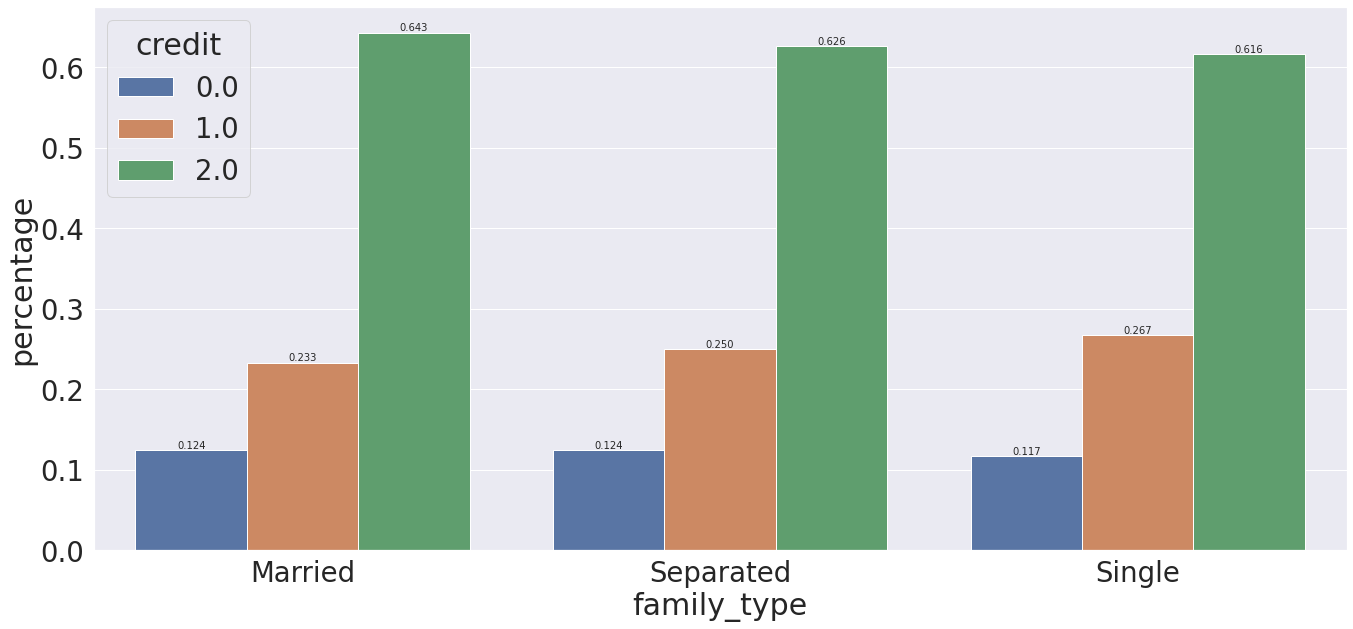

In [ ]:
group_count = (train_adj.groupby(['family_type'])['credit']
              .value_counts(normalize=True)
              .rename('percentage')
              .round(3).reset_index()
              .sort_values(['family_type', 'credit']))
plt.figure(figsize=(20,10))
plot = sns.barplot(x='family_type',y='percentage', hue='credit',data=group_count)
for rect in plot.patches:
    height = rect.get_height()
    plot.text(rect.get_x() + rect.get_width()/2., height,
            '%.3f' % height, ha='center', va='bottom' )

In [ ]:
# train_adj['family_type'][train_adj['family_type']=='Single / not married'] = 'Single'
# train_adj['family_type'][train_adj['family_type']=='Separated'] = 'Single'
# train_adj['family_type'][train_adj['family_type']=='Widow'] = 'Single'
# train_adj['family_type'][train_adj['family_type']=='Civil marriage'] = 'Married'
# train_adj['family_type'].value_counts()

Married    19048
Single      5765
Name: family_type, dtype: int64

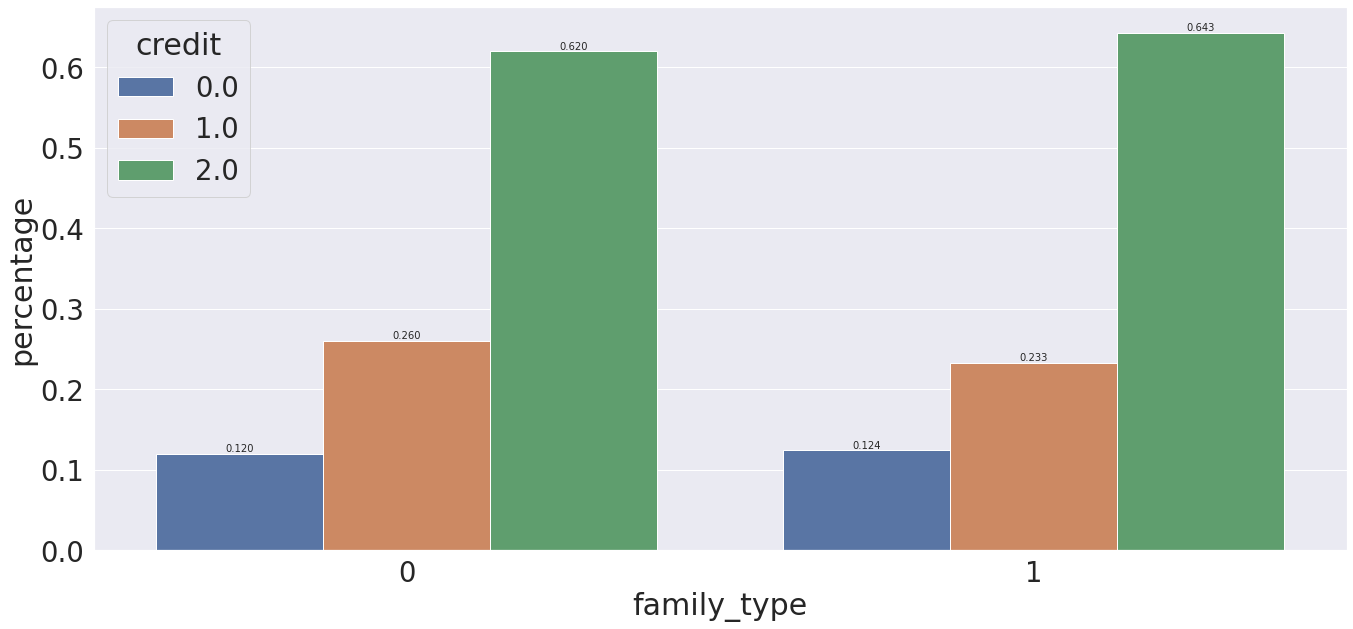

In [ ]:
group_count = (train_adj.groupby(['family_type'])['credit']
              .value_counts(normalize=True)
              .rename('percentage')
              .round(3).reset_index()
              .sort_values(['family_type', 'credit']))
plt.figure(figsize=(20,10))
plot = sns.barplot(x='family_type',y='percentage', hue='credit',data=group_count)
ax = plot
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%.3f' % height, ha='center', va='bottom' )

In [ ]:
# train_adj['family_type'][train_adj['family_type']=='Single'] = 0
# train_adj['family_type'][train_adj['family_type']=='Married'] = 1

## income_type dummies




In [ ]:
train_adj = pd.concat([train_adj,pd.get_dummies(train_adj['income_type'])],axis=1)
train_adj.head()

,ID,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,CARDS,LastIssue,begin_month,credit,age,age_bin,age_score,employ_month,employ_score,begin_bin,produce_pop,Married,Separated,Single,Commercial associate,Pensioner,State servant,Student,Working
0,F17641,F,0,0,0,202500.0,Commercial associate,4,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,5.0,19.0,6.0,1.0,38,2,93,156,36,1,2.0,1,0,0,1,0,0,0,0
1,F22469,F,0,1,1,247500.0,Commercial associate,2,Married,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,5.0,1.0,5.0,1.0,31,2,84,51,29,1,2.0,1,0,0,1,0,0,0,0
2,M08235,M,1,1,0,450000.0,Working,4,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,4.0,7.0,22.0,2.0,52,4,110,147,36,1,2.0,1,0,0,0,0,0,0,1
3,F09484,F,0,1,0,202500.0,Commercial associate,2,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,2.0,15.0,37.0,0.0,41,3,93,69,29,1,2.0,1,0,0,1,0,0,0,0
4,F00004,F,1,1,0,157500.0,State servant,4,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,1.0,0.0,26.0,2.0,41,3,93,70,29,1,2.0,1,0,0,0,0,1,0,0


## house_type dummies


In [ ]:
train_adj['house_type'].value_counts()

House / apartment      22160
With parents            1197
Municipal apartment      784
Rented apartment         400
Office apartment         175
Co-op apartment           97
Name: house_type, dtype: int64

In [ ]:
train_adj['house_type'][train_adj['house_type'] == 'Municipal apartment' ] = 'Rented apartment'
train_adj['house_type'][train_adj['house_type'] == 'Office apartment' ] = 'Rented apartment'
train_adj['house_type'][train_adj['house_type'] == 'Co-op apartment' ] = 'House / apartment'
train_adj['house_type'].value_counts()


House / apartment    22257
Rented apartment      1359
With parents          1197
Name: house_type, dtype: int64

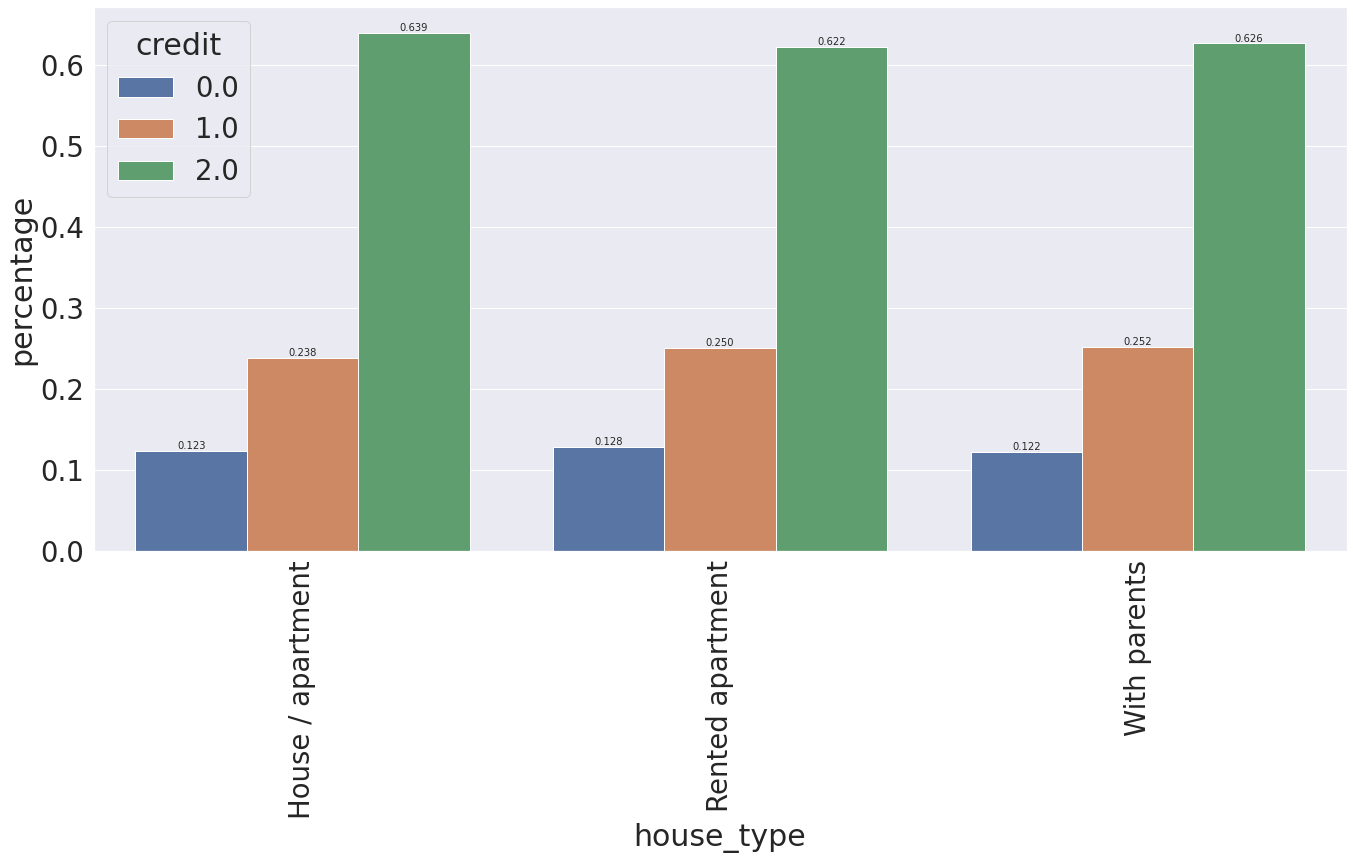

In [ ]:
group_count = (train_adj.groupby(['house_type'])['credit']
              .value_counts(normalize=True)
              .rename('percentage')
              .round(3).reset_index()
              .sort_values(['house_type', 'credit']))
plt.figure(figsize=(20,10))
plot = sns.barplot(x='house_type',y='percentage', hue='credit',data=group_count)
ax = plot
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            '%.3f' % height, ha='center', va='bottom' )
plot.tick_params(labelrotation=90,axis='x')

In [ ]:
train_adj['house_type'][train_adj['house_type'] == 'House / apartment' ] = 42
train_adj['house_type'][train_adj['house_type'] == 'Rented apartment' ] = 28
train_adj['house_type'][train_adj['house_type'] == 'With parents' ] = 32

In [ ]:
train_adj = pd.concat([train_adj,pd.get_dummies(train_adj['house_type'])],axis=1)
train_adj.head()

,ID,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,CARDS,LastIssue,begin_month,credit,age,age_bin,age_score,employ_month,employ_score,begin_bin,produce_pop,Married,Separated,Single,Commercial associate,Pensioner,State servant,Student,Working,28,32,42
0,F17641,F,0,0,0,202500.0,Commercial associate,4,Married,28,-13899,-4709,1,0,0,0,NaN,2.0,5.0,19.0,6.0,1.0,38,2,93,156,36,1,2.0,1,0,0,1,0,0,0,0,1,0,0
1,F22469,F,0,1,1,247500.0,Commercial associate,2,Married,42,-11380,-1540,1,0,0,1,Laborers,3.0,5.0,1.0,5.0,1.0,31,2,84,51,29,1,2.0,1,0,0,1,0,0,0,0,0,0,1
2,M08235,M,1,1,0,450000.0,Working,4,Married,42,-19087,-4434,1,0,1,0,Managers,2.0,4.0,7.0,22.0,2.0,52,4,110,147,36,1,2.0,1,0,0,0,0,0,0,1,0,0,1
3,F09484,F,0,1,0,202500.0,Commercial associate,2,Married,42,-15088,-2092,1,0,1,0,Sales staff,2.0,2.0,15.0,37.0,0.0,41,3,93,69,29,1,2.0,1,0,0,1,0,0,0,0,0,0,1
4,F00004,F,1,1,0,157500.0,State servant,4,Married,42,-15037,-2105,1,0,0,0,Managers,2.0,1.0,0.0,26.0,2.0,41,3,93,70,29,1,2.0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
  train_adj['house_type'].value_counts()

42    22257
28     1359
32     1197
Name: house_type, dtype: int64

## Income_total logscale
- 값의 폭이 상당히 크기 때문에 변환을 진행

In [ ]:
train_adj['income_log'] = np.log(train_adj['income_total'])

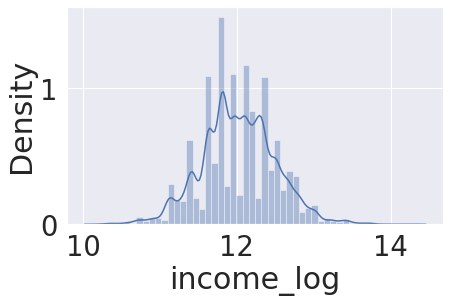

In [ ]:
sns.distplot(train_adj.income_log)

## occyp_type dummies
- 직업이 입력되지 않은 부분은 소득출처와 고용 기준에 따라서 각 최빈값으로 분류
- 첫번째로 고용이 되지 않았는데 수익이 연금인 경우 'retired'로설정
- 두번째로 그냥 입력이 되지 않은 집단은 해당되는 수익출처의 직업중 가장 많은 값을 할당

In [ ]:
train_adj['occyp_type'][(train_adj['occyp_type'].isna()) & (train_adj['income_type'] == 'Pensioner')] = 'Retired'
train_adj['occyp_type'][train_adj['income_type'] == 'Pensioner']

14       Retired
18       Retired
21       Retired
24       Retired
46       Retired
          ...   
26431    Retired
26432    Retired
26439    Retired
26441    Retired
26443    Retired
Name: occyp_type, Length: 4178, dtype: object

In [ ]:
train_adj[(train_adj['occyp_type'].isna())]['income_type']

0        Commercial associate
8        Commercial associate
19                    Working
20                    Working
23                    Working
                 ...         
26433           State servant
26435                 Working
26437                 Working
26449                 Working
26453                 Working
Name: income_type, Length: 3443, dtype: object

In [ ]:
# 'Commercial associate': 'Laborers', 'Working':'Laborers','State servant':'Core staff'
train_adj['occyp_type'][(train_adj['occyp_type'].isna())& (train_adj['income_type']=='State servant')]= 'Core staff'
train_adj['occyp_type'][(train_adj['occyp_type'].isna())& (train_adj['income_type']=='Working')]= 'Laborers'
train_adj['occyp_type'][(train_adj['occyp_type'].isna())& (train_adj['income_type']=='Commercial associate')]= 'Sales staff'

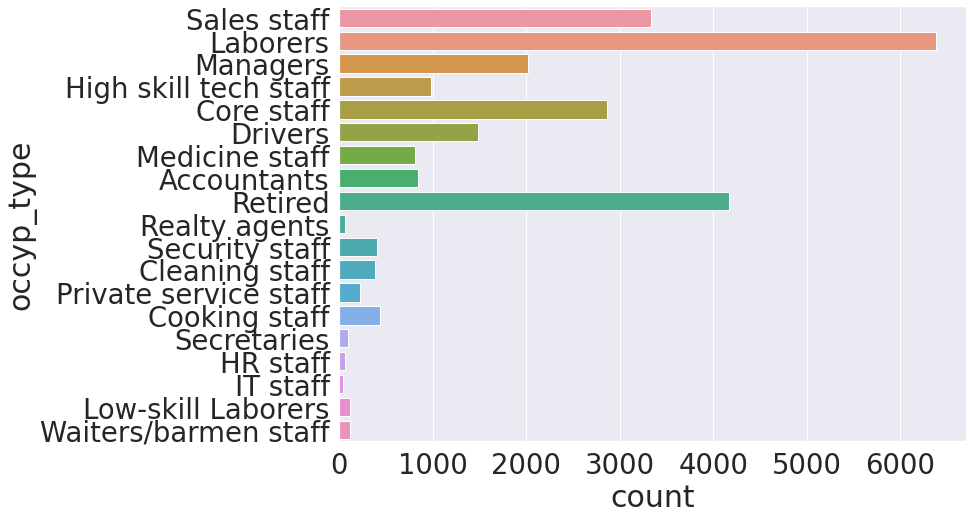

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y='occyp_type',data=train_adj)

In [ ]:
train_adj['occyp_type'].value_counts().index

Index(['Laborers', 'Retired', 'Sales staff', 'Core staff', 'Managers',
       'Drivers', 'High skill tech staff', 'Accountants', 'Medicine staff',
       'Cooking staff', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Waiters/barmen staff', 'Low-skill Laborers',
       'Secretaries', 'Realty agents', 'HR staff', 'IT staff'],
      dtype='object')

In [ ]:
train_adj['occyp_type'][(train_adj['occyp_type']=='Cleaning staff') | (train_adj['occyp_type']=='Cooking staff') | (train_adj['occyp_type']=='Drivers') | 
                        (train_adj['occyp_type']=='Laborers') | (train_adj['occyp_type']=='Low-skill Laborers') | (train_adj['occyp_type']=='Security staff') | 
                        (train_adj['occyp_type']=='Waiters/barmen staff')]='Laborwk'
train_adj['occyp_type'][(train_adj['occyp_type']=='Accountants') | (train_adj['occyp_type']=='Core staff') | (train_adj['occyp_type']=='HR staff') | 
                        (train_adj['occyp_type']=='Medicine staff') | (train_adj['occyp_type']=='Private service staff') | 
                        (train_adj['occyp_type']=='Realty agents') | (train_adj['occyp_type']=='Sales staff') | (train_adj['occyp_type']=='Secretaries')]='officewk'
train_adj['occyp_type'][(train_adj['occyp_type']=='Managers') | (train_adj['occyp_type']=='High skill tech staff') | (train_adj['occyp_type']=='IT staff')] = 'hightecwk'
train_adj['occyp_type'].value_counts()

Laborwk      9312
officewk     8284
Retired      4169
hightecwk    3047
Name: occyp_type, dtype: int64

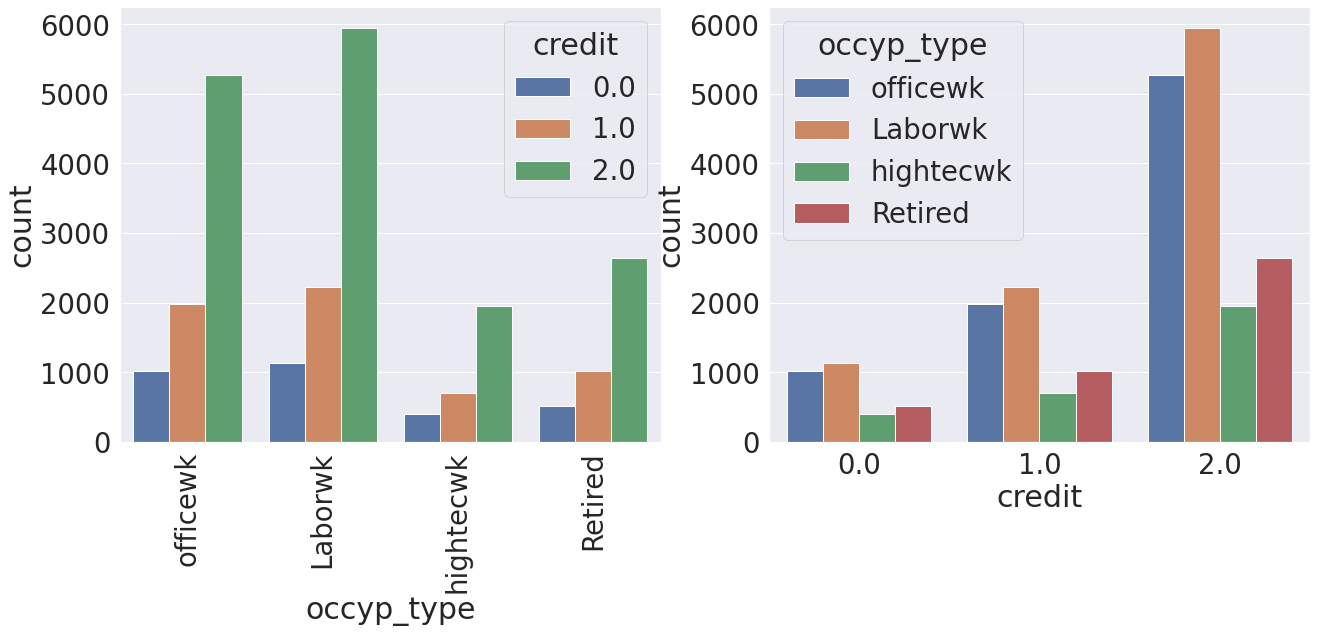

In [ ]:
f, ax = plt.subplots(1,2,figsize= (19,8))
sns.countplot('occyp_type',hue='credit',data=train_adj,ax=ax[0])
ax[0].tick_params(labelrotation=90,axis='x')
sns.countplot('credit',hue='occyp_type',data=train_adj,ax=ax[1])

In [ ]:
train_adj = pd.concat([train_adj,pd.get_dummies(train_adj['occyp_type'])],axis=1)
train_adj.head()

,ID,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,CARDS,LastIssue,begin_month,credit,age,age_bin,age_score,employ_month,employ_score,begin_bin,produce_pop,Married,Separated,Single,Commercial associate,Pensioner,State servant,Student,Working,28,32,42,income_log,Laborwk,Retired,hightecwk,officewk
0,F17641,F,0,0,0,202500.0,Commercial associate,4,Married,28,-13899,-4709,1,0,0,0,officewk,2.0,5.0,19.0,6.0,1.0,38,2,93,156,36,1,2.0,1,0,0,1,0,0,0,0,1,0,0,12.218495,0,0,0,1
1,F22469,F,0,1,1,247500.0,Commercial associate,2,Married,42,-11380,-1540,1,0,0,1,Laborwk,3.0,5.0,1.0,5.0,1.0,31,2,84,51,29,1,2.0,1,0,0,1,0,0,0,0,0,0,1,12.419166,1,0,0,0
2,M08235,M,1,1,0,450000.0,Working,4,Married,42,-19087,-4434,1,0,1,0,hightecwk,2.0,4.0,7.0,22.0,2.0,52,4,110,147,36,1,2.0,1,0,0,0,0,0,0,1,0,0,1,13.017003,0,0,1,0
3,F09484,F,0,1,0,202500.0,Commercial associate,2,Married,42,-15088,-2092,1,0,1,0,officewk,2.0,2.0,15.0,37.0,0.0,41,3,93,69,29,1,2.0,1,0,0,1,0,0,0,0,0,0,1,12.218495,0,0,0,1
4,F00004,F,1,1,0,157500.0,State servant,4,Married,42,-15037,-2105,1,0,0,0,hightecwk,2.0,1.0,0.0,26.0,2.0,41,3,93,70,29,1,2.0,1,0,0,0,0,1,0,0,0,0,1,11.967181,0,0,1,0


In [ ]:
train_adj.credit.value_counts()

2.0    15820
1.0     5933
0.0     3060
Name: credit, dtype: int64

## New Variable

In [ ]:
train_adj.columns

Index([                  'ID',               'gender',                  'car',
                    'reality',            'child_num',         'income_total',
                'income_type',             'edu_type',          'family_type',
                 'house_type',           'DAYS_BIRTH',        'DAYS_EMPLOYED',
                 'FLAG_MOBIL',           'work_phone',                'phone',
                      'email',           'occyp_type',          'family_size',
                      'CARDS',            'LastIssue',          'begin_month',
                     'credit',                  'age',              'age_bin',
                  'age_score',         'employ_month',         'employ_score',
                  'begin_bin',          'produce_pop',              'Married',
                  'Separated',               'Single', 'Commercial associate',
                  'Pensioner',        'State servant',              'Student',
                    'Working',                     2

In [ ]:
train_adj['newscore'] = train_adj['age_score'] + train_adj['age_score'] +train_adj['employ_score'] + train_adj['house_type']

# Feature Engineering Conclusion

### 무의미한 Feature
|Feature|제외 이유|
|----|----|
|FLAG_MOBIL| 모두 휴대폰을 가지고 있음|
|phone, work_phone,email,gender| 커뮤니케이션 수단, 성별에 따른 비율에 차이가 없음|
|DAYS_EMPLOYED| 달 단위로 바꿨는데 credit에 큰 의미가 없었음|

### 애매한 Feature
-  범주형 변수인데 의미가 있는지 애매모호해서 일단 사용하고 변수선택  

|Feature|변환내용|
|----|----|
|house_type| feature 속성의 의미를 잘 몰라서 따로 손대진 않음|
|occyp_type| featue 속성을 총 세가지로 줄임|
|child_num /family_size| 서로 상관: 모델에서 하나만 사용할텐데 자녀수 3이상 가족수5 이상은 각각 3과 5에 합침|

### 유의미한 Feature

|Feature|변환내용|
|----|----|
|car| 더미화 1,0|
|reality| 더미화 1.0|
|income_type| 총 다섯가지 변수로 더미화 시켰음|
|family_type| 싱글과 결혼으로 더미화 싱글이 0 결혼이 1|
|edu_type|고학력자 1 저학력자 0으로 더미화|
|DAYS_BIRTH|년단위로 변환= 연속형, 범주형 둘 다 있음, 나이대에 따른 신용등급 편차가 있음 3 4 50대|
|begin_month|***가장 강력한 변수***, 연속형, 범주형 둘 다 있음|
|income_total|***유일한 연속형 변수***,로그변환 시킨 변수 추가함|


## Interaction Feature


In [ ]:
forinteraction = train_adj.loc[:,['car', 'reality', 'income_log','edu_type', 'family_type', 'age','begin_month', 
       'Commercial associate', 'Pensioner', 'State servant', 'Student','Working']]

In [ ]:
len(forinteraction.columns)

12

In [ ]:
f, ax = plt.subplots(1,len(forinteraction.columns),figsize=(44,8))
for i in range(len(forinteraction.columns)):
  sns.scatterplot(forinteraction.income_log,forinteraction.iloc[:,i],ax=ax[i])

In [ ]:
f, ax = plt.subplots(1,len(forinteraction.columns),figsize=(44,8))
for i in range(len(forinteraction.columns)):
  sns.scatterplot(forinteraction.begin_month,forinteraction.iloc[:,i],ax=ax[i])

In [ ]:
f, ax = plt.subplots(1,len(forinteraction.columns),figsize=(44,8))
for i in range(len(forinteraction.columns)):
  sns.scatterplot(forinteraction.age,forinteraction.iloc[:,i],ax=ax[i])

### age * income_log

In [ ]:
train_adj['income_log * age'] = train_adj['income_log'] * train_adj['age']

### income_log * car

In [ ]:
train_adj['income_log * car'] = train_adj['income_log'] * train_adj['car']

### income_log * Commercial associate

In [ ]:
train_adj['income_log * Commercial associate'] = train_adj['income_log'] * train_adj['Commercial associate']

### income_log * Pensioner

In [ ]:
train_adj['income_log * Pensioner'] = train_adj['income_log'] * train_adj['Pensioner']

### begin_month * age

In [ ]:
train_adj['begin_month * age'] = train_adj['begin_month'] * train_adj['age']